# Proyecto 2 

**Desarrollado por:** Orlando Patricio Chacón Molina

**Fecha de creación:** 2022-02-26

**Fecha de actualización:** 2022-02-27

# Morosidad de clientes.
En este proyecto se aplicarán técnicas de aprendizaje automático, tanto supervisado como no supervisado, para predecir y analizar la morosidad de clientes.

El conjunto de datos está basada en los datos reales de una empresa proveedora de servicio de Internet.
Los datos han sido previamente anonimizados y escalados, con el fin de preservar la identidad de clientes, así como proteger la información sensible.

Diccionario del conjunto de datos.
<table>
    <tr>
        <td>
            <b>invoice_id</b>
        </td>
        <td>
            Identificador del número de factura.(Múltiples ítems pueden pertenecer a la misma factura).
        </td>
    </tr>
    <tr>
        <td>
            <b>service_contract_id</b>
        </td>
        <td>
            Identificador del número de contrato.
        </td>
    </tr>
    <tr>
        <td>
            <b>neighborhood</b>
        </td>
        <td>
            Sector en el que se ha instalado el servicio.
        </td>
    </tr>
    <tr>
        <td>
            <b>contract_days</b>
        </td>
        <td>
            Días transcurridos desde la fecha de contratación hasta la fecha de pago.
        </td>
    </tr>
    <tr>
        <td>
            <b>days_past_due</b>
        </td>
        <td>
            Días de retraso o anticipo en el pago <em>( 0< days_past_due >= 0 )</em>. Si <em>days_past_due</em> es negativo, significa que el pago se anticipó <em>|days_past_due|</em> días, caso contrario si es positivo, el pago se retrasó en <em>days_past_due</em>.
        </td>
    </tr>
    <tr>
        <td>
            <b>access_type</b>
        </td>
        <td>
            Tipo de acceso.
        </td>
    </tr>
    <tr>
        <td>
            <b>contract_plan</b>
        </td>
        <td>
            Tipo de contrato, corresponde al plan contratado por el cliente.
        </td>
    </tr>
    <tr>
        <td>
            <b>lat</b>
        </td>
        <td>
            Latitud de la instalación
        </td>
    </tr>
    <tr>
        <td>
            <b>lng</b>
        </td>
        <td>
            Longitud de la instalación
        </td>
    </tr>
    <tr>
        <td>
            <b>emision_date</b>
        </td>
        <td>
            Fecha de emisión de la factura
        </td>
    </tr>
    <tr>
        <td>
            <b>total_factura</b>
        </td>
        <td>
            Valor total de la factura a la cual pertenece el <em>item</em>. Pueden existir varios registros con el mismo numero de factura.
        </td>
    </tr>
    <tr>
        <td>
            <b>item_price</b>
        </td>
        <td>
            Valor del item facturado
        </td>
    </tr>
    <tr>
        <td>
            <b>incident_type</b>
        </td>
        <td>
            Tipo de incidente, NULL si el cliente no ha reportado un incidente  dentro del periodo (mes).
        </td>
    </tr>
    <tr>
        <td>
            <b>incident_count</b>
        </td>
        <td>
            Cantidad de veces que el cliente ha reportado un incidente dentro del periodo (mes).
        </td>
    </tr>
</table>

<b>Nota:</b> <em>trabajo en proceso, el diccionario de datos podría variar en función de nuevos requerimientos o descubrimiento de nuevas características que se consideren relevantes.</em>


In [439]:
import pandas as pd
import numpy as np


import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from matplotlib.colors import ListedColormap

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay

from sklearn.preprocessing import OneHotEncoder

from xgboost import XGBRegressor
from xgboost import XGBClassifier

In [59]:
filename = 'data/morosidad.csv'
originalData = pd.read_csv(filename)
originalData.head()

,invoice_id,service_contract_id,neighborhood,contract_days,days_past_due,access_type,contract_plan,lat,lng,emision_date,total_factura,item_price,incident_type,incident_count
0,999850,99996835,23,1385,-5,0,47,-1.548273,-6.299125,2015-06-05 12:30:45,949.4,949.4,NaN,NaN
1,999263,99996835,23,1420,0,0,47,-1.548273,-6.299125,2015-07-10 16:17:06,949.4,949.4,NaN,NaN
2,998765,99996835,23,1452,1,0,47,-1.548273,-6.299125,2015-08-11 16:21:02,949.4,949.4,NaN,NaN
3,998341,99996835,23,1482,0,0,47,-1.548273,-6.299125,2015-09-10 12:44:35,949.4,949.4,NaN,NaN
4,997776,99996835,23,1514,2,0,47,-1.548273,-6.299125,2015-10-12 10:55:37,949.4,949.4,NaN,NaN


In [60]:
originalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100173 entries, 0 to 100172
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   invoice_id           100173 non-null  int64  
 1   service_contract_id  100173 non-null  int64  
 2   neighborhood         100173 non-null  int64  
 3   contract_days        100173 non-null  int64  
 4   days_past_due        100173 non-null  int64  
 5   access_type          100173 non-null  int64  
 6   contract_plan        100173 non-null  int64  
 7   lat                  97407 non-null   float64
 8   lng                  97401 non-null   float64
 9   emision_date         100173 non-null  object 
 10  total_factura        100173 non-null  float64
 11  item_price           100173 non-null  float64
 12  incident_type        9326 non-null    float64
 13  incident_count       9326 non-null    float64
dtypes: float64(6), int64(7), object(1)
memory usage: 10.7+ MB


In [61]:
data=originalData.copy()

#data.drop(columns=['service_contract_id'], inplace=True)

#Los campos indicent_type e incident_count son nulos cuando un cliente no ha reportado un incidente en el periodo
data['incident_type']=data['incident_type'].fillna(0)
data['incident_count']=data['incident_count'].fillna(0)
data['lat']=data['lat'].fillna(data['lat'].mean())
data['lng']=data['lng'].fillna(data['lng'].mean())
data['days_past_due']=data['days_past_due'].fillna(data['days_past_due'].mean())


# Se crea el objeto data2 para mantener el original sin modificaciones
data['year'] = data['emision_date'].apply(lambda x: int(x[0:4]))
data['month'] = data['emision_date'].apply(lambda x: int(x[5:7]))
data['day'] = data['emision_date'].apply(lambda x: int(x[8:10]))
data['hour'] = data['emision_date'].apply(lambda x: int(x[11:13]))
data['minute'] = data['emision_date'].apply(lambda x: int(x[14:16]))


data['emision_date']= data['emision_date'].astype('datetime64')

data['week_day'] = data['emision_date'].dt.dayofweek


#data.drop(columns=['emision_date'], inplace=True)
data.head()


# Temporalmente eliminado, buscar estrategia para mantener el los datos nulos del 
# número de factura, los nulos corresponden con los items pendientes de pago
data.dropna(inplace=True)

data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100173 entries, 0 to 100172
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   invoice_id           100173 non-null  int64         
 1   service_contract_id  100173 non-null  int64         
 2   neighborhood         100173 non-null  int64         
 3   contract_days        100173 non-null  int64         
 4   days_past_due        100173 non-null  int64         
 5   access_type          100173 non-null  int64         
 6   contract_plan        100173 non-null  int64         
 7   lat                  100173 non-null  float64       
 8   lng                  100173 non-null  float64       
 9   emision_date         100173 non-null  datetime64[ns]
 10  total_factura        100173 non-null  float64       
 11  item_price           100173 non-null  float64       
 12  incident_type        100173 non-null  float64       
 13  incident_count

In [62]:
data.corr()

,invoice_id,service_contract_id,neighborhood,contract_days,days_past_due,access_type,contract_plan,lat,lng,total_factura,item_price,incident_type,incident_count,year,month,day,hour,minute,week_day
invoice_id,1.000000,0.584101,0.024210,-0.055794,-0.193471,-0.360094,-0.319567,0.014839,-0.011667,-0.067265,-0.003538,-0.029595,-0.005278,-0.910917,-0.004567,-0.063995,0.035073,-0.009114,0.021957
service_contract_id,0.584101,1.000000,-0.001779,0.612091,-0.074560,-0.252656,-0.555159,0.033723,-0.024790,-0.125747,0.030159,-0.029556,-0.013417,-0.547375,-0.007142,-0.014473,0.010031,-0.008475,0.029228
neighborhood,0.024210,-0.001779,1.000000,-0.004923,-0.042697,-0.017796,-0.024355,0.028504,0.003859,-0.015761,0.008761,0.007562,0.010344,-0.030675,0.000223,-0.017151,0.019746,0.002085,-0.016027
contract_days,-0.055794,0.612091,-0.004923,1.000000,0.022328,0.002904,-0.292472,0.007899,-0.008148,-0.095801,0.009799,-0.008734,-0.010643,0.067670,-0.007892,0.032549,-0.017352,-0.000241,0.023918
days_past_due,-0.193471,-0.074560,-0.042697,0.022328,1.000000,0.093769,0.073431,-0.006582,0.004942,0.086411,0.027808,-0.020055,-0.031381,0.187302,0.021393,0.254379,0.059834,0.015086,-0.026296
access_type,-0.360094,-0.252656,-0.017796,0.002904,0.093769,1.000000,0.268248,-0.018736,0.010745,0.030669,-0.000924,0.051348,0.035389,0.424344,-0.025997,0.027222,0.009083,0.005615,-0.029265
contract_plan,-0.319567,-0.555159,-0.024355,-0.292472,0.073431,0.268248,1.000000,-0.038399,0.015084,0.120121,0.084324,0.039867,0.032226,0.289604,-0.002260,0.015116,0.019861,0.002930,-0.028745
lat,0.014839,0.033723,0.028504,0.007899,-0.006582,-0.018736,-0.038399,1.000000,-0.684906,-0.015976,0.006252,-0.001282,-0.000911,-0.009886,0.001281,-0.001855,-0.007870,0.001444,-0.004866
lng,-0.011667,-0.024790,0.003859,-0.008148,0.004942,0.010745,0.015084,-0.684906,1.000000,0.010954,-0.003860,0.000758,-0.000855,0.008395,0.002577,-0.000091,0.000900,-0.001686,0.002114
total_factura,-0.067265,-0.125747,-0.015761,-0.095801,0.086411,0.030669,0.120121,-0.015976,0.010954,1.000000,0.167512,-0.003497,-0.012702,0.057464,0.019845,0.052338,0.020051,0.000278,-0.013596


### Funciones datos comunes

Definición de paletas de colores

In [63]:
colorPalette = ['#DB6E1D','#D74E57','#B14B7E','#77528A','#435279','#2F4858',
                '#1C6E7D','#039590','#4BBC8E','#9BDE7E','#F9F871']
myCmap = ListedColormap(colorPalette)

In [64]:
meses ={
    1:'Enero',
    2:'Febrero',
    3:'Marzo',
    4:'Abril',
    5:'Mayo',
    6:'Junio',
    7:'Julio',
    8:'Agosto',
    9:'Septiembre',
    10:'Octubre',
    11:'Noviembre',
    12:'Diciembre',
}

## Análisis Exploratorio
En esta sección se explora y analizan los datos para obtener información que permita entender de forma general el conjunto de datos y permita generar gráficos representativos.

### Promedio de días de mora por año y mes

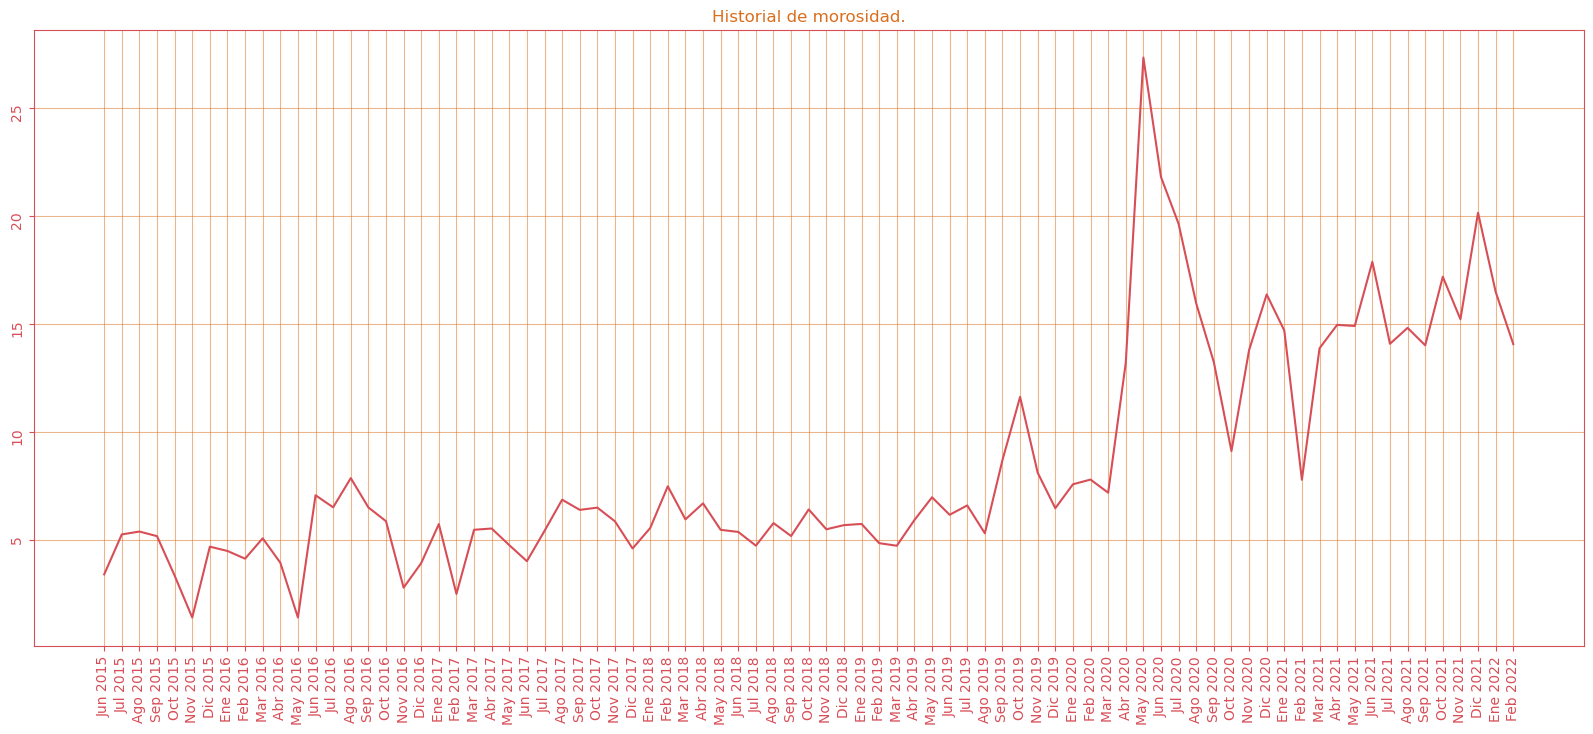

In [65]:
meanPastDue = data[data['emision_date']>='2015-06-01' ].groupby(['year','month'])['days_past_due'].mean().reset_index().sort_values(['year','month'])
meanPastDue['period'] = meanPastDue['month'].apply(lambda x: meses[x][0:3]) + ' ' + meanPastDue['year'].map(str)
meanPastDue.index = meanPastDue['period']
meanPastDue = meanPastDue.drop(columns=['year','month','period'])

fig, ax = plt.subplots(1,1,figsize=(20,8))
ax.plot(meanPastDue['days_past_due'], c=colorPalette[1])
ax.tick_params(labelrotation=90)
ax.set_title('Historial de morosidad.',c=colorPalette[0])
ax.xaxis.grid(alpha=0.5, c=colorPalette[0])
ax.yaxis.grid(alpha=0.5, c=colorPalette[0])

ax.set_axisbelow(True)
ax.tick_params(color=colorPalette[1], labelcolor=colorPalette[1])
for spine in ax.spines.values():
    spine.set_edgecolor(colorPalette[1])


En la figura anterior se puede observar que el promedio de días de mora para cada periodo(Año-mes). En promedio los pagos se realizan con 5 días de mora desde 2015-05(mayo de 2015) hasta 2019-10(octubre de 2019) donde se evidencia un incremento significativo en la morosidad(alerta de COVID19 en China); sin embargo, a partir del mes periodo 2020-04(fecha cercana las restricciones locales por el virus COVID) la morosidad se incrementa drásticamente. Llega a su pico más alto en el periodo 2020-05(mayo de 2020) y se reduce en los meses posteriores. No obstante, los niveles de morosidad se mantienen en los 15 días aproximadamente, frente a los 5 días de mora de los primeros periodos.

### Distribución espacial del promedio de morosidad por cliente.

El siguiente gráfico de nube de puntos representa, mediante una escala de color, el promedio de mora por cliente.

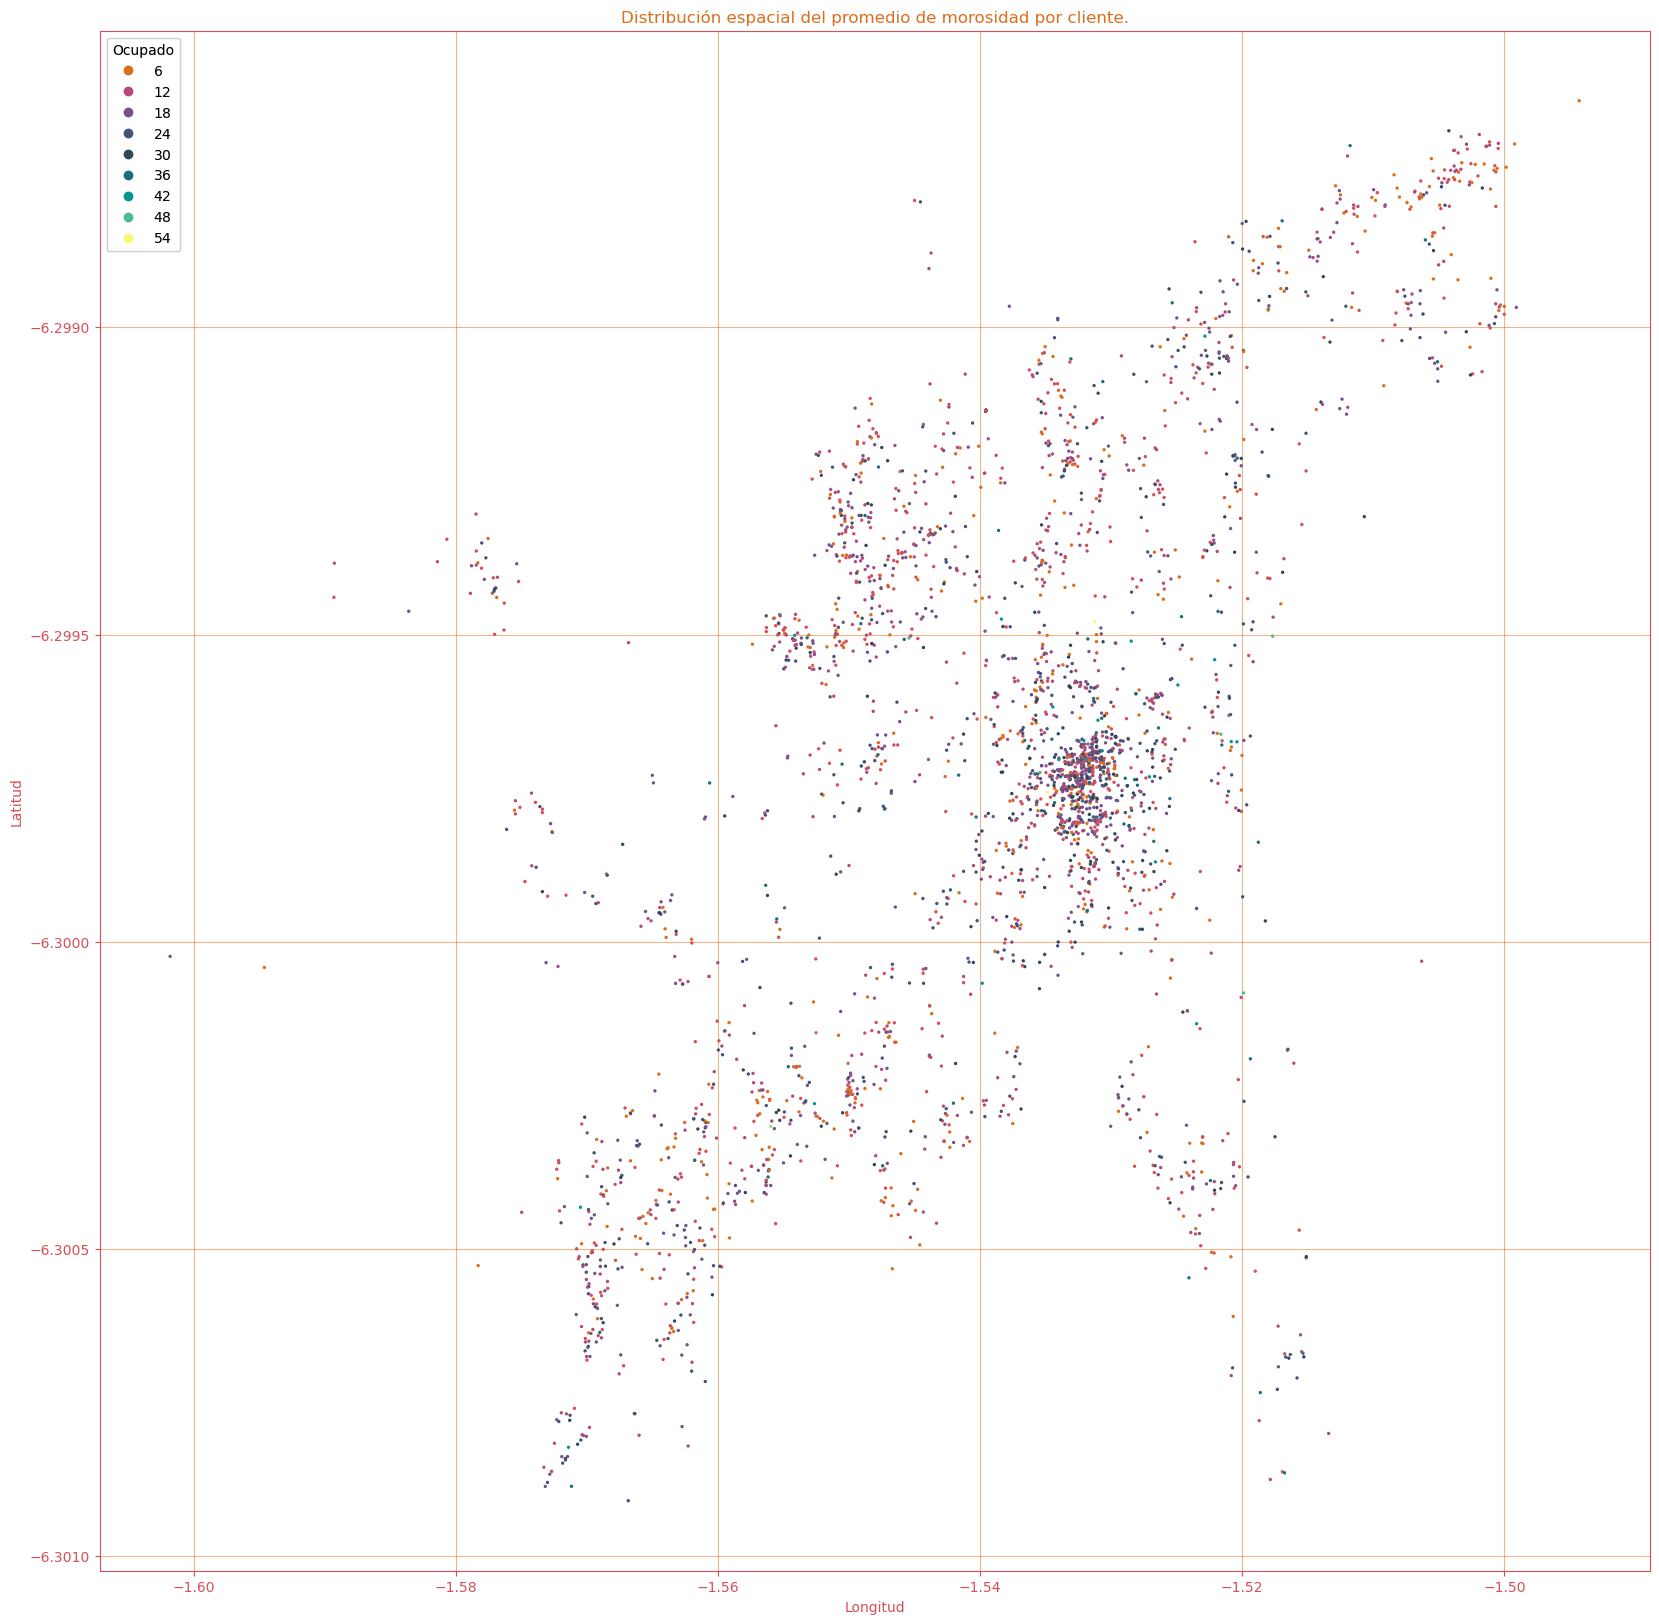

In [66]:
#meanPastDue = data.groupby(['year','month'])['days_past_due'].mean().reset_index().sort_values(['year','month'])
#meanPastDue['period'] = meanPastDue['year'].map(str) + '_'+meanPastDue['month'].map(str)
#meanPastDue.index = meanPastDue['period']
#meanPastDue = meanPastDue.drop(columns=['year','month','period'])

data2 = data[(data['lat']>-5) & (data['lat']<-1.2) & (data['lng']<-6.297) & (data['days_past_due']<60)& (data['days_past_due']>0)]
data2=data2.groupby(['service_contract_id'])[['days_past_due','lat','lng']].mean().reset_index()

fig, ax = plt.subplots(1,1,figsize=(20,20))
scatter = ax.scatter(data2['lat'],data2['lng'],c=data2['days_past_due'], s=2, cmap=myCmap)
#ax.tick_params(labelrotation=90)
ax.set_xlabel('Longitud',color=colorPalette[1])
ax.set_ylabel('Latitud',color=colorPalette[1])
ax.set_title('Distribución espacial del promedio de morosidad por cliente.',color=colorPalette[0])

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Ocupado")
ax.add_artist(legend1)
ax.xaxis.grid(alpha=0.5, c=colorPalette[0])
ax.yaxis.grid(alpha=0.5, c=colorPalette[0])

ax.set_axisbelow(True)
ax.tick_params(color=colorPalette[1], labelcolor=colorPalette[1])
for spine in ax.spines.values():
    spine.set_edgecolor(colorPalette[1])



### Días y horas de mayor recaudación y concurrencia
En esta sección se analizan los días de la semana y los horas de mayor recaudación y concurrencia.

#### a. Días de mayor recaudación

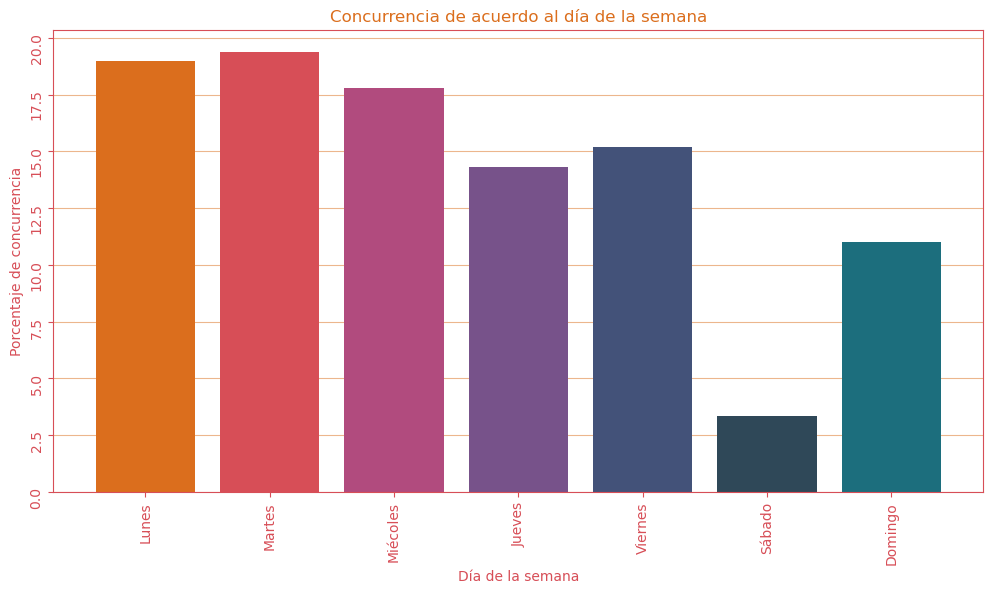

In [67]:
dateFilter = (data['year']>=2021) & (data['year']<2025)

meanPastDue = data[dateFilter].groupby(['week_day']).sum().reset_index().sort_values(['week_day'])
meanPastDue.index = meanPastDue['week_day'].replace({0:'Lunes',1:'Martes',2:'Miécoles',3:'Jueves',4:'Viernes',5:'Sábado',6:'Domingo',})
meanPastDue = meanPastDue.drop(columns=['week_day'])

fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.bar(x=meanPastDue['total_factura'].index, height=meanPastDue['total_factura']/data.loc[dateFilter,['total_factura']].sum()['total_factura']*100,color=colorPalette)
ax.tick_params(labelrotation=90)
ax.set_xlabel('Día de la semana',color=colorPalette[1])
ax.set_ylabel('Porcentaje de concurrencia',color=colorPalette[1])
ax.set_title('Concurrencia de acuerdo al día de la semana',color=colorPalette[0])
ax.yaxis.grid(alpha=0.5, c=colorPalette[0])

ax.set_axisbelow(True)
ax.tick_params(color=colorPalette[1], labelcolor=colorPalette[1])
for spine in ax.spines.values():
    spine.set_edgecolor(colorPalette[1])



#### a. Días de mayor concurrencia

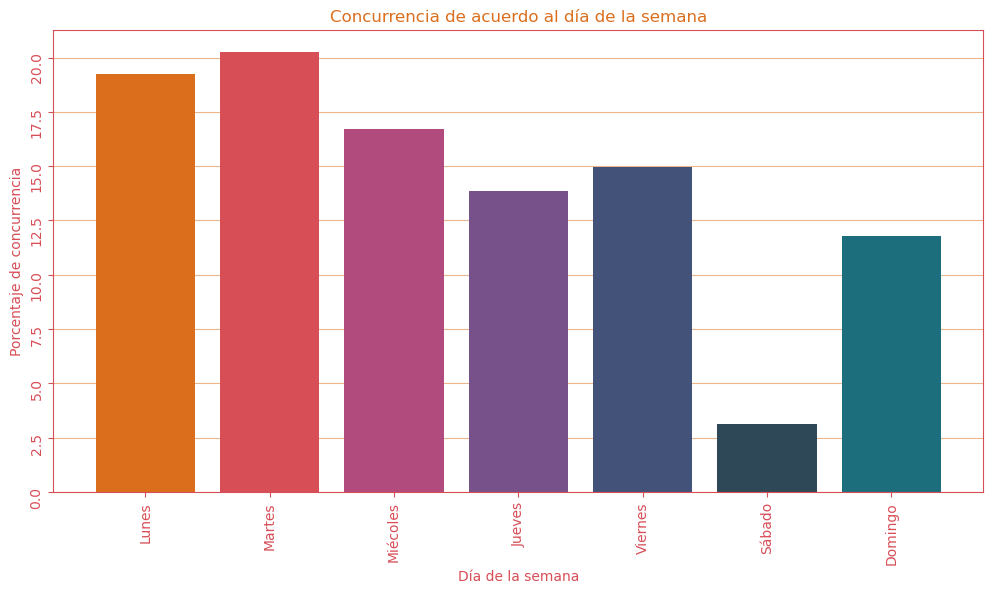

In [68]:
dateFilter = (data['year']>=2021) & (data['year']<2025)

meanPastDue = data[dateFilter].groupby(['week_day']).count().reset_index().sort_values(['week_day'])
meanPastDue.index = meanPastDue['week_day'].replace({0:'Lunes',1:'Martes',2:'Miécoles',3:'Jueves',4:'Viernes',5:'Sábado',6:'Domingo',})
meanPastDue = meanPastDue.drop(columns=['week_day'])

fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.bar(x=meanPastDue['days_past_due'].index, height=meanPastDue['days_past_due']/len(data[dateFilter])*100,color=colorPalette)
ax.tick_params(labelrotation=90)
ax.set_xlabel('Día de la semana',color=colorPalette[1])
ax.set_ylabel('Porcentaje de concurrencia',color=colorPalette[1])
ax.set_title('Concurrencia de acuerdo al día de la semana',color=colorPalette[0])
ax.yaxis.grid(alpha=0.5, c=colorPalette[0])

ax.set_axisbelow(True)
ax.tick_params(color=colorPalette[1], labelcolor=colorPalette[1])
for spine in ax.spines.values():
    spine.set_edgecolor(colorPalette[1])

#### b. Horas de mayor concurrencia.

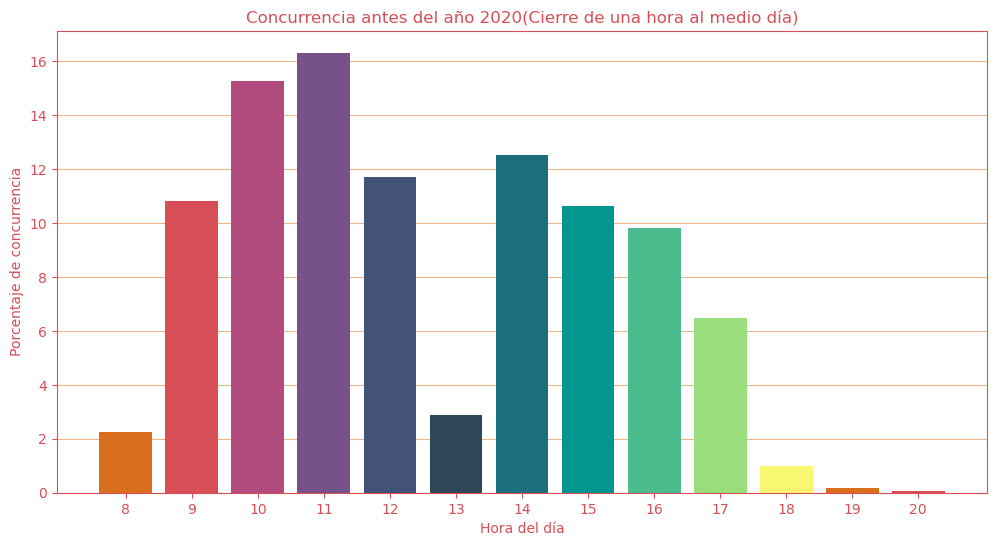

In [69]:
dateFilter = (data['year']>=2010) & (data['year']<=2019) & (data['hour']>=8) & (data['hour']<=20)

meanPastDue = data[dateFilter].groupby(['hour']).count().reset_index().sort_values(['hour'])
meanPastDue.index = meanPastDue['hour'].map(str)
meanPastDue = meanPastDue.drop(columns=['hour'])

fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.bar(x=meanPastDue['days_past_due'].index, height=meanPastDue['days_past_due']/len(data[dateFilter])*100,color=colorPalette)
ax.set_xlabel('Hora del día',color=colorPalette[1])
ax.set_ylabel('Porcentaje de concurrencia',color=colorPalette[1])
ax.set_title('Concurrencia antes del año 2020(Cierre de una hora al medio día)',color=colorPalette[1])
ax.yaxis.grid(alpha=0.5, c=colorPalette[0])

ax.set_axisbelow(True)
ax.tick_params(color=colorPalette[1], labelcolor=colorPalette[1])
for spine in ax.spines.values():
    spine.set_edgecolor(colorPalette[1])

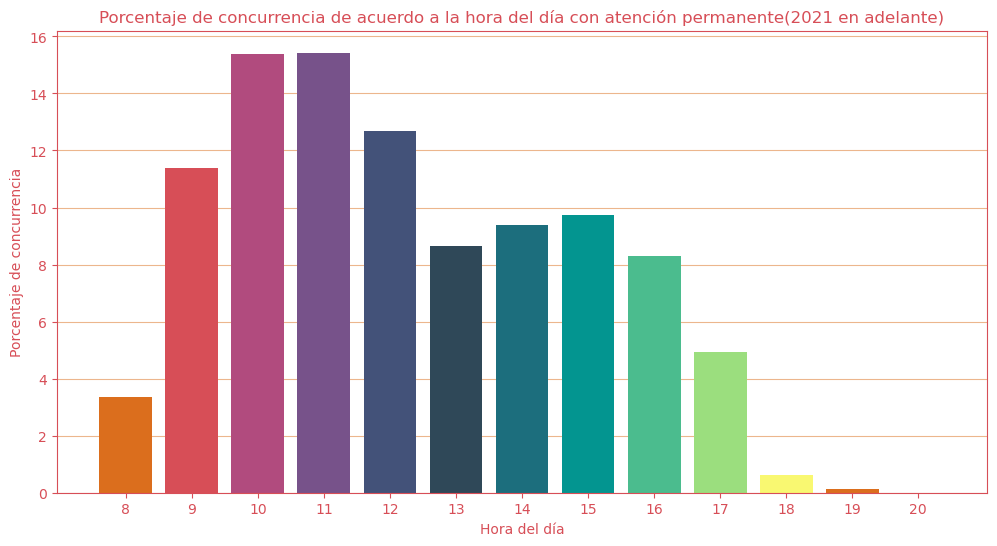

In [70]:
dateFilter = (data['year']>=2021) & (data['year']<2025) & (data['hour']>=8) & (data['hour']<=20)

meanPastDue = data[dateFilter].groupby(['hour']).count().reset_index().sort_values(['hour'])
meanPastDue.index = meanPastDue['hour'].map(str)
meanPastDue = meanPastDue.drop(columns=['hour'])

fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.bar(x=meanPastDue['days_past_due'].index, height=meanPastDue['days_past_due']/len(data[dateFilter])*100,color=colorPalette)
ax.set_xlabel('Hora del día',color=colorPalette[1])
ax.set_ylabel('Porcentaje de concurrencia',color=colorPalette[1])
ax.set_title('Porcentaje de concurrencia de acuerdo a la hora del día con atención permanente(2021 en adelante)',color=colorPalette[1])
ax.yaxis.grid(alpha=0.5, c=colorPalette[0])

ax.set_axisbelow(True)
ax.tick_params(color=colorPalette[1], labelcolor=colorPalette[1])
for spine in ax.spines.values():
    spine.set_edgecolor(colorPalette[1])

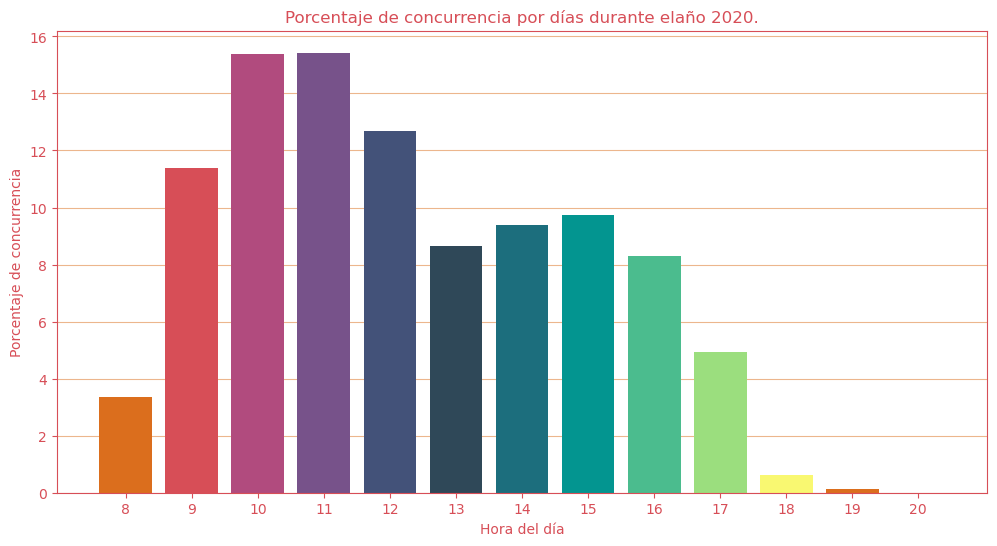

In [71]:
dateFilter = (data['year']>=2021) & (data['year']<=2025) & (data['hour']>=8) & (data['hour']<=20)

meanPastDue = data[dateFilter].groupby(['hour']).count().reset_index().sort_values(['hour'])
meanPastDue.index = meanPastDue['hour'].map(str)
meanPastDue = meanPastDue.drop(columns=['hour'])

fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.bar(x=meanPastDue['days_past_due'].index, height=meanPastDue['days_past_due']/len(data[dateFilter])*100,color=colorPalette)
ax.set_xlabel('Hora del día',color=colorPalette[1])
ax.set_ylabel('Porcentaje de concurrencia',color=colorPalette[1])
ax.set_title('Porcentaje de concurrencia por días durante elaño 2020.',color=colorPalette[1])
ax.yaxis.grid(alpha=0.5, c=colorPalette[0])

ax.set_axisbelow(True)
ax.tick_params(color=colorPalette[1], labelcolor=colorPalette[1])
for spine in ax.spines.values():
    spine.set_edgecolor(colorPalette[1])

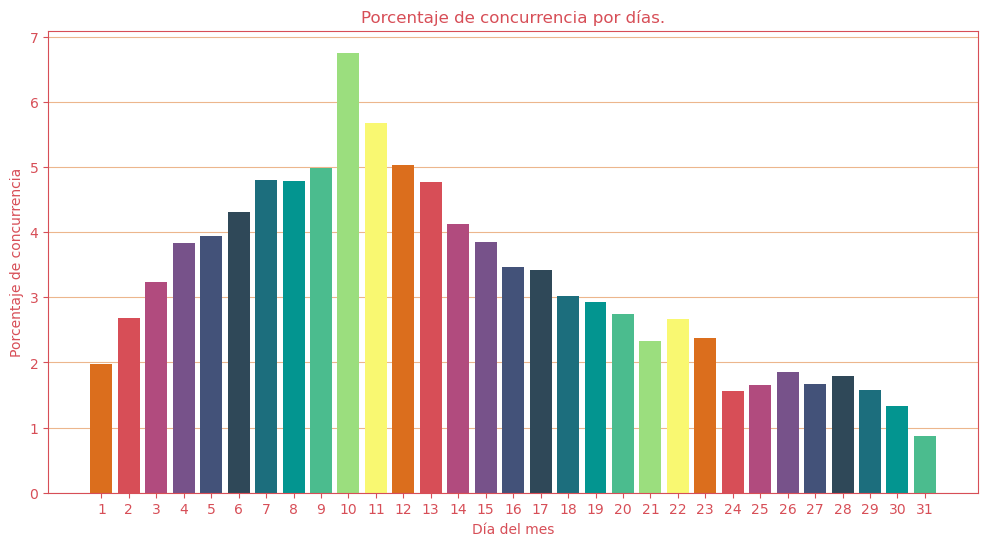

In [72]:
dateFilter = (data['hour']>=8) & (data['hour']<=20)

meanPastDue = data[dateFilter].groupby(['day']).count().reset_index().sort_values(['day'])
meanPastDue.index = meanPastDue['day'].map(str)
meanPastDue = meanPastDue.drop(columns=['day'])

fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.bar(x=meanPastDue['days_past_due'].index, height=meanPastDue['days_past_due']/len(data[dateFilter])*100,color=colorPalette)
ax.set_xlabel('Día del mes',color=colorPalette[1])
ax.set_ylabel('Porcentaje de concurrencia',color=colorPalette[1])
ax.set_title('Porcentaje de concurrencia por días.',color=colorPalette[1])
ax.yaxis.grid(alpha=0.5, c=colorPalette[0])

ax.set_axisbelow(True)
ax.tick_params(color=colorPalette[1], labelcolor=colorPalette[1])
for spine in ax.spines.values():
    spine.set_edgecolor(colorPalette[1])

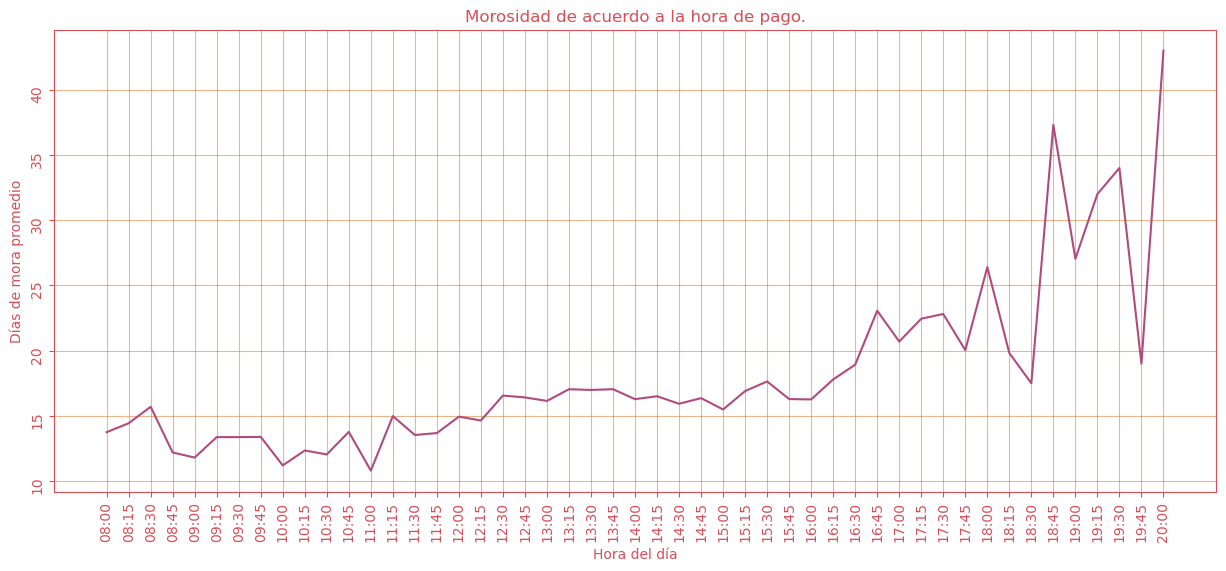

In [73]:
paymentTime = data.copy()
dateFilter  = (paymentTime['emision_date'].dt.year >= 2021) & (paymentTime['emision_date'].dt.year < 2025)
paymentTime = paymentTime[dateFilter]

paymentTime['emision_date'] = paymentTime['emision_date'].apply(lambda x: x.replace(year = 2000))
paymentTime['emision_date'] = paymentTime['emision_date'].apply(lambda x: x.replace(month = 1))
paymentTime['emision_date'] = paymentTime['emision_date'].apply(lambda x: x.replace(day = 1))
paymentTime['emision_date'] = paymentTime['emision_date'].apply(lambda x: x.replace(minute = (x.minute // 15)*15  ))
paymentTime['emision_date'] = paymentTime['emision_date'].apply(lambda x: x.replace(second = 0))

paymentTime = paymentTime.groupby(['emision_date'])['days_past_due'].mean().reset_index().sort_values(['emision_date'])
paymentTime.index = paymentTime['emision_date'].dt.hour.apply(lambda x: ('0' + str(x))[-2:]+':') + paymentTime['emision_date'].dt.minute.apply(lambda x: ('0' + str(x))[-2:])
paymentTime.drop(columns=['emision_date'], inplace=True)
#paymentTime.plot(style='k',figsize=(20,10),grid=True)


fig, ax = plt.subplots(1,1,figsize=(15,6))
ax.plot(paymentTime,color=colorPalette[2])
ax.set_xlabel('Hora del día',color=colorPalette[1])
ax.set_ylabel('Días de mora promedio',color=colorPalette[1])
ax.set_title('Morosidad de acuerdo a la hora de pago.',color=colorPalette[1])
ax.tick_params(labelrotation=90)
ax.yaxis.grid(alpha=0.5, c=colorPalette[0])
ax.xaxis.grid(alpha=0.5, c=colorPalette[0])

ax.set_axisbelow(True)
ax.tick_params(color=colorPalette[1], labelcolor=colorPalette[1])
for spine in ax.spines.values():
    spine.set_edgecolor(colorPalette[1])

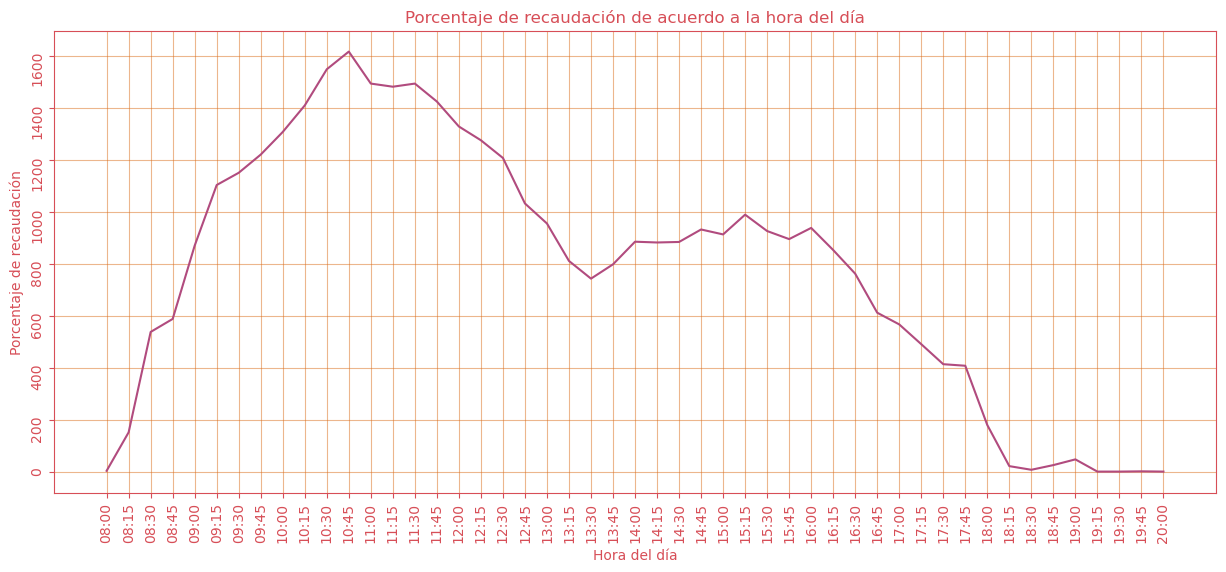

In [74]:
paymentTime = data.copy()
dateFilter  = (paymentTime['emision_date'].dt.year >= 2021) & (paymentTime['emision_date'].dt.year < 2025)
paymentTime = paymentTime[dateFilter]

paymentTime['emision_date'] = paymentTime['emision_date'].apply(lambda x: x.replace(year = 2000))
paymentTime['emision_date'] = paymentTime['emision_date'].apply(lambda x: x.replace(month = 1))
paymentTime['emision_date'] = paymentTime['emision_date'].apply(lambda x: x.replace(day = 1))
paymentTime['emision_date'] = paymentTime['emision_date'].apply(lambda x: x.replace(minute = (x.minute // 15)*15  ))
paymentTime['emision_date'] = paymentTime['emision_date'].apply(lambda x: x.replace(second = 0))

paymentTime = paymentTime.groupby(['emision_date'])['days_past_due'].count().reset_index().sort_values(['emision_date'])
paymentTime.index = paymentTime['emision_date'].dt.hour.apply(lambda x: ('0' + str(x))[-2:]+':') + paymentTime['emision_date'].dt.minute.apply(lambda x: ('0' + str(x))[-2:])
paymentTime.drop(columns=['emision_date'], inplace=True)
#paymentTime.plot(style='k',figsize=(20,10),grid=True)


fig, ax = plt.subplots(1,1,figsize=(15,6))
ax.plot(paymentTime,color=colorPalette[2])
ax.set_xlabel('Hora del día',color=colorPalette[1])
ax.set_ylabel('Porcentaje de recaudación',color=colorPalette[1])
ax.set_title('Porcentaje de recaudación de acuerdo a la hora del día',color=colorPalette[1])
ax.tick_params(labelrotation=90)
ax.yaxis.grid(alpha=0.5, c=colorPalette[0])
ax.xaxis.grid(alpha=0.5, c=colorPalette[0])

ax.set_axisbelow(True)
ax.tick_params(color=colorPalette[1], labelcolor=colorPalette[1])
for spine in ax.spines.values():
    spine.set_edgecolor(colorPalette[1])

### Días de mora promedio por sector

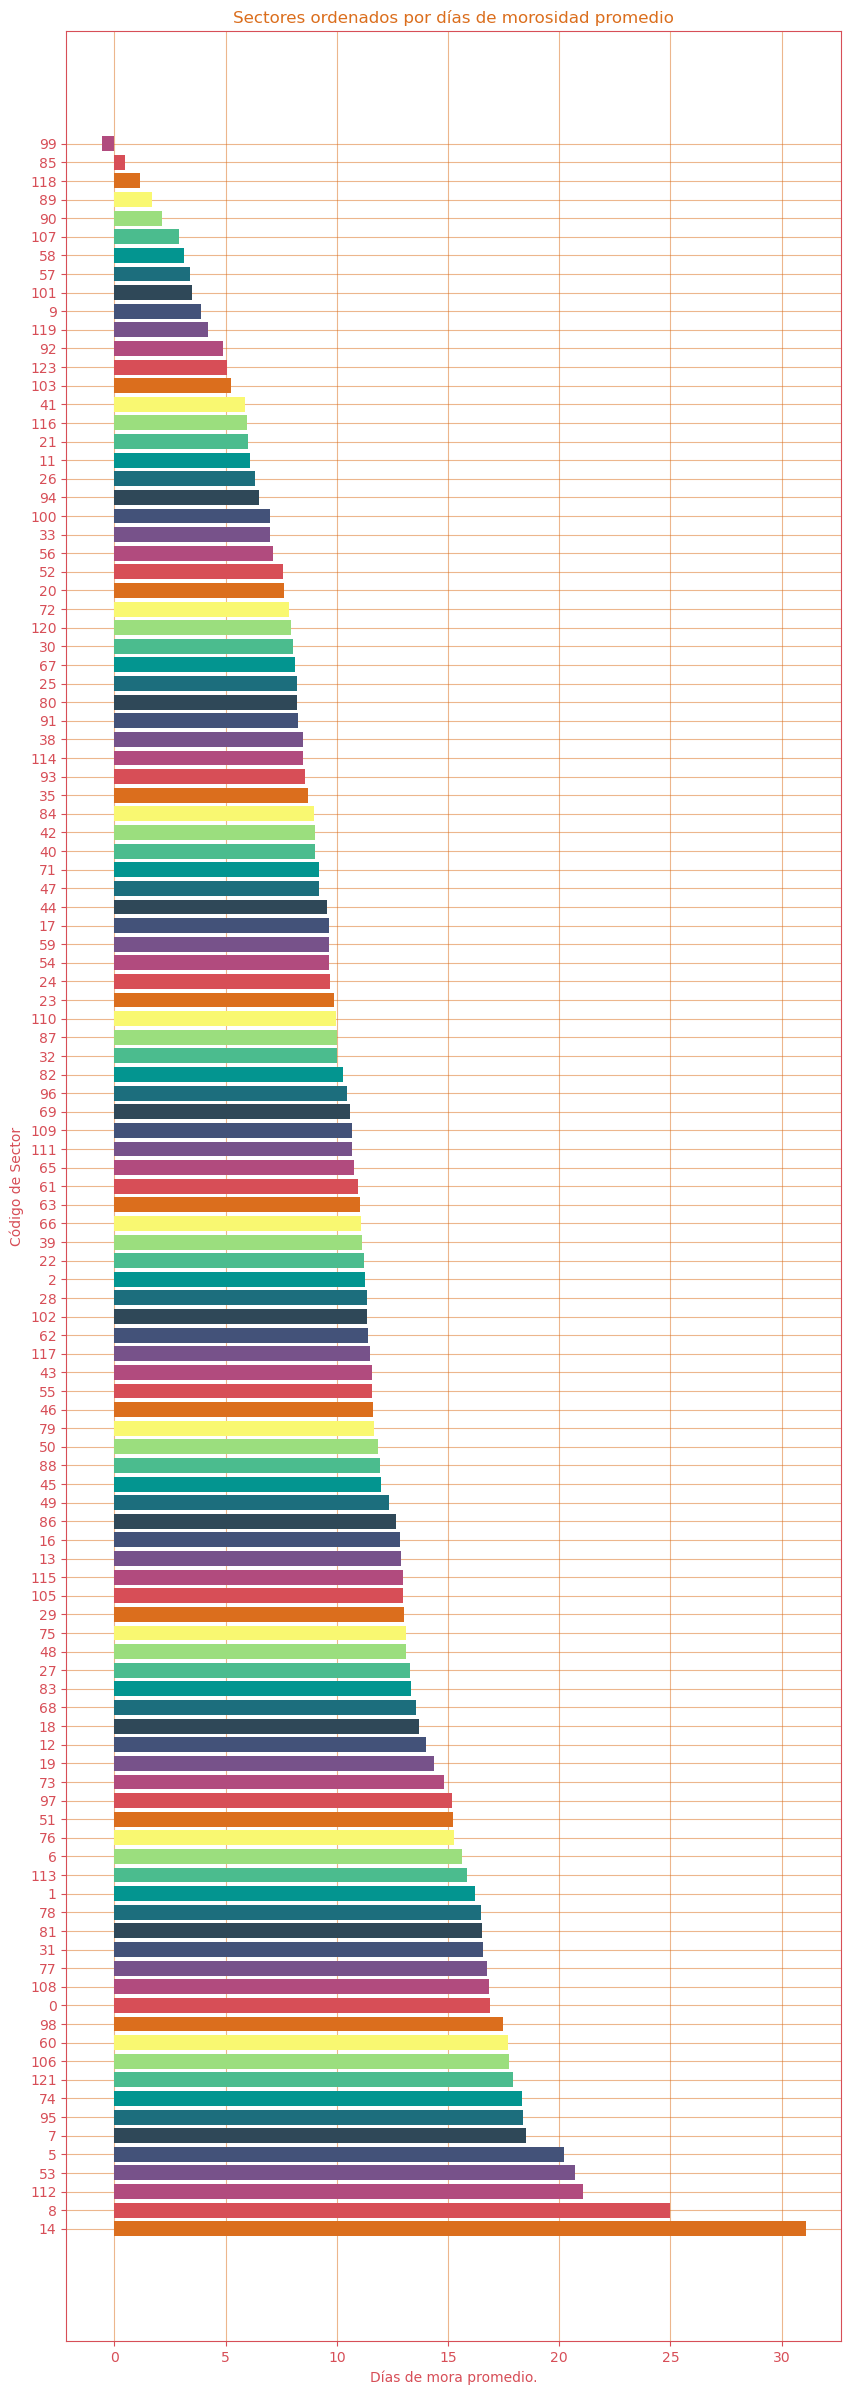

In [75]:
neighborhoodStats = data[data['year']>=2020].groupby('neighborhood').count()[['invoice_id']].join(data.groupby('neighborhood').mean()['days_past_due'], on='neighborhood')
neighborhoodStats.rename(columns={'invoice_id':'count', 'days_past_due':'mean_days_past_due'}, inplace=True)

neighborhoodStats = data.groupby('neighborhood')['days_past_due'].mean().reset_index().sort_values('days_past_due', ascending=False)
fig, ax = plt.subplots(1,1,figsize=(10,30))
ax.barh(neighborhoodStats['neighborhood'].map(str),neighborhoodStats['days_past_due'],color=colorPalette)
ax.set_xlabel('Días de mora promedio.',color=colorPalette[1])
ax.set_ylabel('Código de Sector',color=colorPalette[1])
ax.set_title('Sectores ordenados por días de morosidad promedio',color=colorPalette[0])
ax.yaxis.grid(alpha=0.5, c=colorPalette[0])
ax.xaxis.grid(alpha=0.5, c=colorPalette[0])

ax.set_axisbelow(True)
ax.tick_params(color=colorPalette[1], labelcolor=colorPalette[1])
for spine in ax.spines.values():
    spine.set_edgecolor(colorPalette[1])

## Definición de métricas.
Se aborda el problema desde tres puntos de vista:
1. Ténicas de regresión:
    * Predecir los días de mora de un cliente.
        * Las métricas que se utilizarán para evaluar los modelos serán: $R^2$, $MAE$ y $RMSE$, con especial énfasis en $R^2$.
2. Técnicas de clasificación:
    * Clasificar a un cliente como moroso o no moroso, para lo cual se definirá un umbral de corte(moroso no moroso). Posteriormente se entrenará el modelo en este conjunto de datos transformado.
        * Las métricas que se utilizarán serán: Accuracy, Precision, Recall y F1-Score, con especial énfasis en F1-Score. 
3. Agrupamiento de clientes.
    * Utilizar modelos de agrupamiento(clustering) para segmentar a los clientes.
        * El Coeficiente de la silueta será la métrica a utilizar para determinar el agrupamiento más adecauado.


In [76]:
data.head()

,invoice_id,service_contract_id,neighborhood,contract_days,days_past_due,access_type,contract_plan,lat,lng,emision_date,total_factura,item_price,incident_type,incident_count,year,month,day,hour,minute,week_day
0,999850,99996835,23,1385,-5,0,47,-1.548273,-6.299125,2015-06-05 12:30:45,949.4,949.4,0.0,0.0,2015,6,5,12,30,4
1,999263,99996835,23,1420,0,0,47,-1.548273,-6.299125,2015-07-10 16:17:06,949.4,949.4,0.0,0.0,2015,7,10,16,17,4
2,998765,99996835,23,1452,1,0,47,-1.548273,-6.299125,2015-08-11 16:21:02,949.4,949.4,0.0,0.0,2015,8,11,16,21,1
3,998341,99996835,23,1482,0,0,47,-1.548273,-6.299125,2015-09-10 12:44:35,949.4,949.4,0.0,0.0,2015,9,10,12,44,3
4,997776,99996835,23,1514,2,0,47,-1.548273,-6.299125,2015-10-12 10:55:37,949.4,949.4,0.0,0.0,2015,10,12,10,55,0


In [77]:
data.corr()

,invoice_id,service_contract_id,neighborhood,contract_days,days_past_due,access_type,contract_plan,lat,lng,total_factura,item_price,incident_type,incident_count,year,month,day,hour,minute,week_day
invoice_id,1.000000,0.584101,0.024210,-0.055794,-0.193471,-0.360094,-0.319567,0.014839,-0.011667,-0.067265,-0.003538,-0.029595,-0.005278,-0.910917,-0.004567,-0.063995,0.035073,-0.009114,0.021957
service_contract_id,0.584101,1.000000,-0.001779,0.612091,-0.074560,-0.252656,-0.555159,0.033723,-0.024790,-0.125747,0.030159,-0.029556,-0.013417,-0.547375,-0.007142,-0.014473,0.010031,-0.008475,0.029228
neighborhood,0.024210,-0.001779,1.000000,-0.004923,-0.042697,-0.017796,-0.024355,0.028504,0.003859,-0.015761,0.008761,0.007562,0.010344,-0.030675,0.000223,-0.017151,0.019746,0.002085,-0.016027
contract_days,-0.055794,0.612091,-0.004923,1.000000,0.022328,0.002904,-0.292472,0.007899,-0.008148,-0.095801,0.009799,-0.008734,-0.010643,0.067670,-0.007892,0.032549,-0.017352,-0.000241,0.023918
days_past_due,-0.193471,-0.074560,-0.042697,0.022328,1.000000,0.093769,0.073431,-0.006582,0.004942,0.086411,0.027808,-0.020055,-0.031381,0.187302,0.021393,0.254379,0.059834,0.015086,-0.026296
access_type,-0.360094,-0.252656,-0.017796,0.002904,0.093769,1.000000,0.268248,-0.018736,0.010745,0.030669,-0.000924,0.051348,0.035389,0.424344,-0.025997,0.027222,0.009083,0.005615,-0.029265
contract_plan,-0.319567,-0.555159,-0.024355,-0.292472,0.073431,0.268248,1.000000,-0.038399,0.015084,0.120121,0.084324,0.039867,0.032226,0.289604,-0.002260,0.015116,0.019861,0.002930,-0.028745
lat,0.014839,0.033723,0.028504,0.007899,-0.006582,-0.018736,-0.038399,1.000000,-0.684906,-0.015976,0.006252,-0.001282,-0.000911,-0.009886,0.001281,-0.001855,-0.007870,0.001444,-0.004866
lng,-0.011667,-0.024790,0.003859,-0.008148,0.004942,0.010745,0.015084,-0.684906,1.000000,0.010954,-0.003860,0.000758,-0.000855,0.008395,0.002577,-0.000091,0.000900,-0.001686,0.002114
total_factura,-0.067265,-0.125747,-0.015761,-0.095801,0.086411,0.030669,0.120121,-0.015976,0.010954,1.000000,0.167512,-0.003497,-0.012702,0.057464,0.019845,0.052338,0.020051,0.000278,-0.013596


In [409]:
daysPastDueMean = data.dropna().groupby(['service_contract_id'])[['days_past_due']].mean().reset_index().rename(columns={'days_past_due':'days_past_due_mean'})
daysPastDueStd = data.groupby(['service_contract_id'])[['days_past_due']].std().reset_index().rename(columns={'days_past_due':'days_past_due_std'})
dataSc = pd.merge(daysPastDueMean,daysPastDueStd,on='service_contract_id')

meanLat = data['lat'].mean()
meanLng = data['lng'].mean()

latLng = data.groupby(['service_contract_id'])[['lat','lng']].std().reset_index()
latLng.fillna({'lat':meanLat,'lng':meanLng},inplace=True)
latLng['lat'].replace({0.0:meanLat},inplace=True)
latLng['lng'].replace({0.0:meanLng},inplace=True)

pd.merge(daysPastDueMean,daysPastDueStd,on='service_contract_id')
dataSc = pd.merge(dataSc,latLng,on='service_contract_id')

neighborhood = data.groupby(['service_contract_id'])[['neighborhood']].mean().reset_index().astype({'neighborhood':int})
dataSc = pd.merge(dataSc,neighborhood,on='service_contract_id')

paymentCount = data.groupby(['service_contract_id'])[['days_past_due']].count().reset_index().rename(columns={'days_past_due':'count'})
dataSc = pd.merge(dataSc,paymentCount,on='service_contract_id')

contractPlan = data.groupby(['service_contract_id'])[['contract_plan']].count().reset_index().astype({'contract_plan':int})
dataSc = pd.merge(dataSc,contractPlan,on='service_contract_id')

contractPlan = data.groupby(['service_contract_id'])[['incident_count']].count().reset_index().astype({'incident_count':int})
dataSc = pd.merge(dataSc,contractPlan,on='service_contract_id')

#dataSc.sort_values('days_past_due_std').iloc[1000:1030, :]
dataSc.dropna(inplace=True)
dataSc.reset_index(drop=True, inplace=True)

dataSc

,service_contract_id,days_past_due_mean,days_past_due_std,lat,lng,neighborhood,count,contract_plan,incident_count
0,80481445,-24.000000,19.798990,-1.539568,-6.299135,78,2,2,2
1,80519425,6.500000,10.606602,-1.539568,-6.299135,13,2,2,2
2,80525755,8.500000,7.778175,-1.539568,-6.299135,49,2,2,2
3,80532085,7.000000,8.485281,-1.539568,-6.299135,7,2,2,2
4,80538415,6.000000,9.899495,-1.539568,-6.299135,28,2,2,2
...,...,...,...,...,...,...,...,...,...
3219,99974680,44.437500,33.115895,-1.539568,-6.299135,23,16,16,16
3220,99981010,0.270270,10.215885,-1.539568,-6.299135,27,74,74,74
3221,99984175,30.065789,24.304368,-1.539568,-6.299135,73,76,76,76
3222,99990505,5.456790,8.851623,-1.539568,-6.299135,24,81,81,81


Kmeans Clustering

In [410]:
#dataSc = data.groupby(['service_contract_id'])[['days_past_due','lat','lng','cluster']].mean('days_past_due').reset_index()

#data3 = data[(data['lat']>-5) & (data['lat']<-1.2) & (data['lng']<-6.297) & (data['days_past_due']<60)& (data['days_past_due']>0)]


[[   0  333]
 [   1  998]
 [   2 1061]
 [   3  795]]


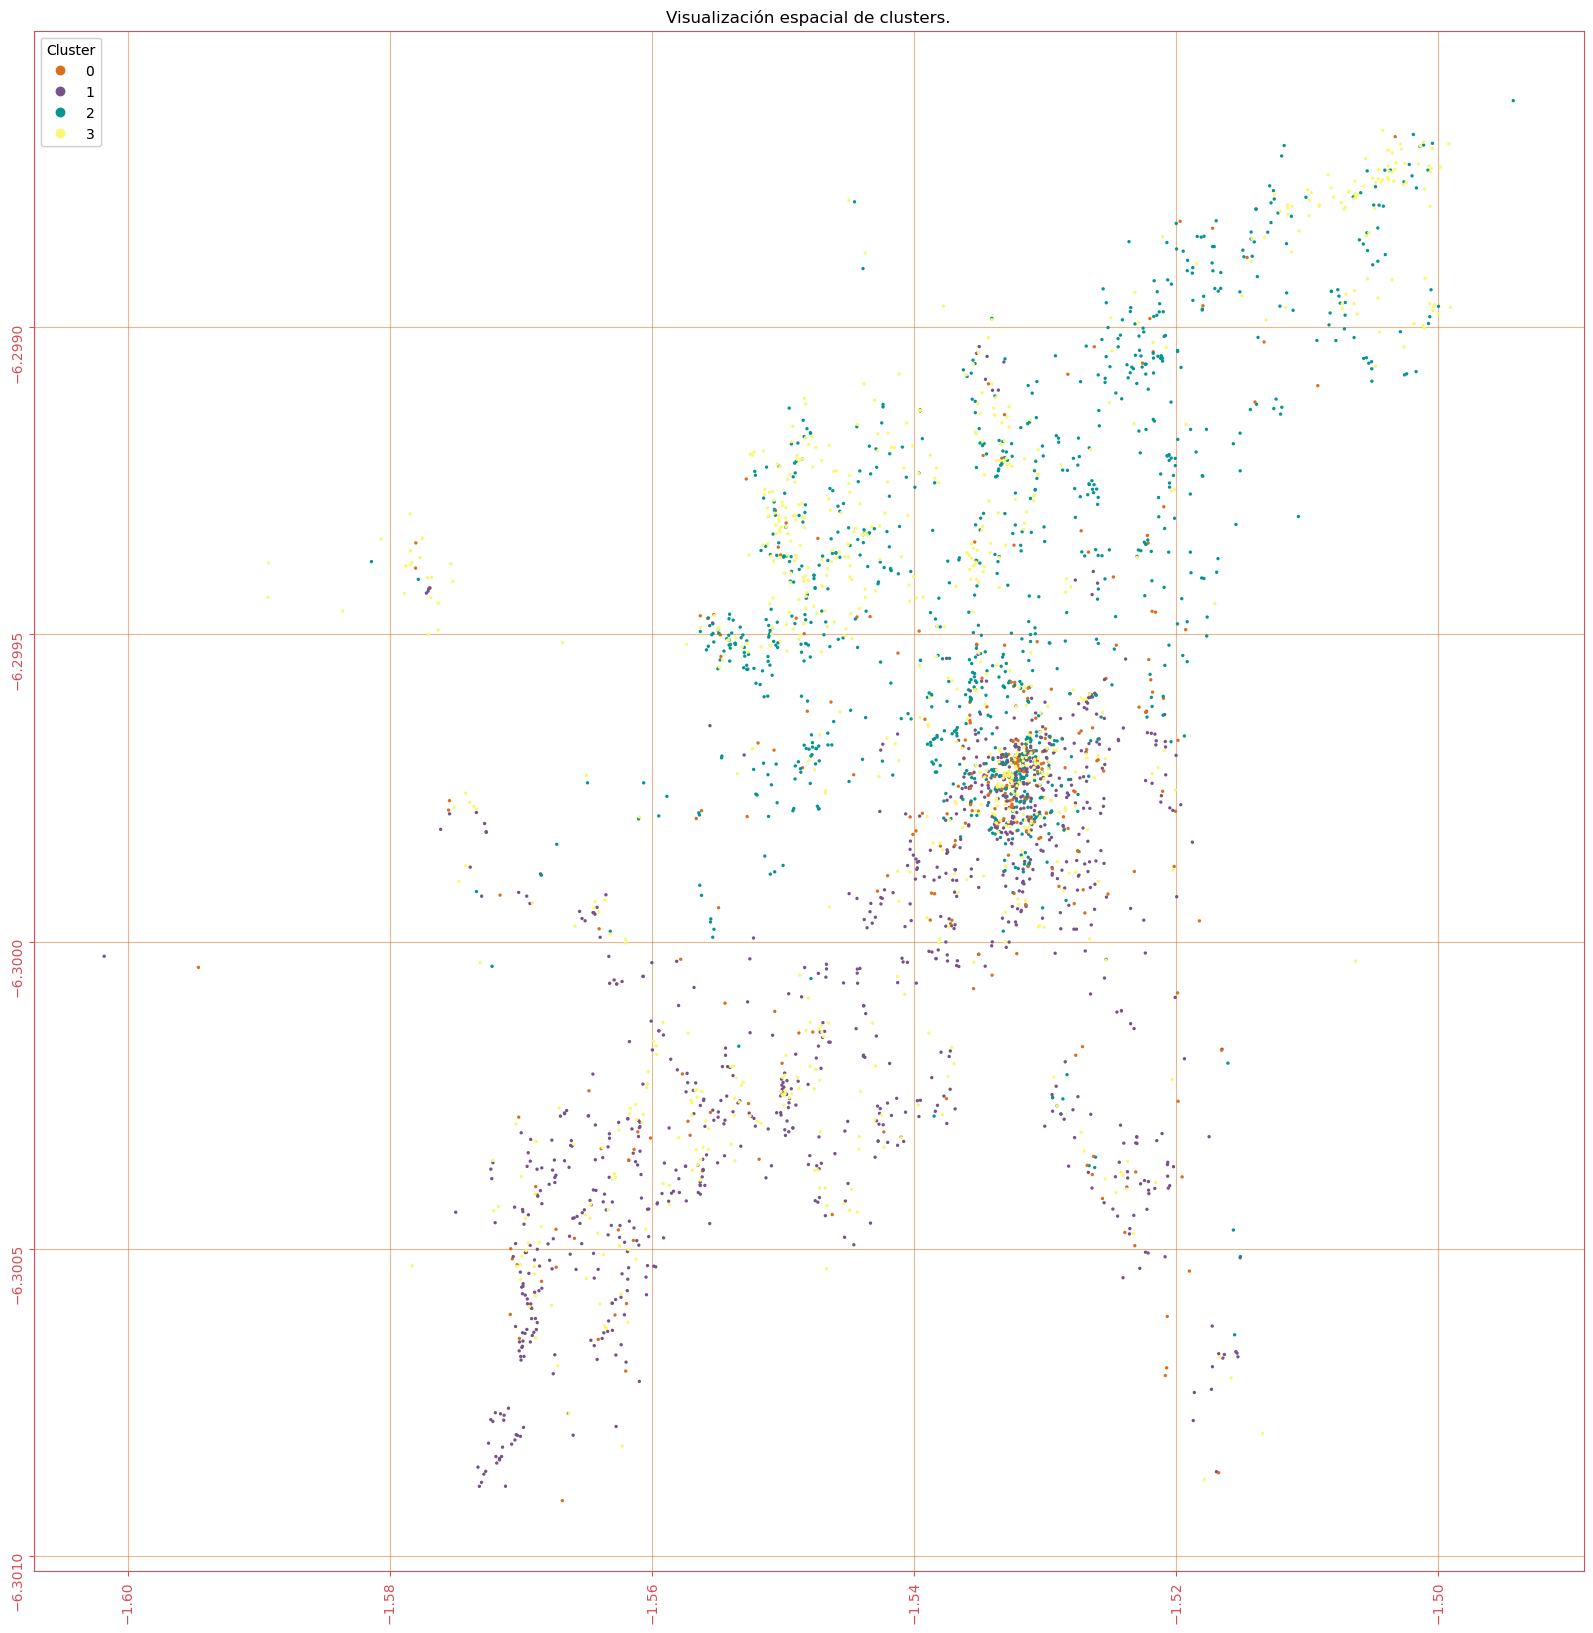

In [411]:
data3 = data[(data['lat']>-5) & (data['lat']<-1.2) & (data['lng']<-6.297) & (data['days_past_due']<60)& (data['days_past_due']>0)].groupby(['service_contract_id']).mean()

scaler = StandardScaler()
scaledData = scaler.fit_transform(data3)
data3= data3.loc[:,['days_past_due']]
cluster = KMeans(n_clusters=4,random_state=3)
cluster.fit(scaledData)

data3['cluster'] = cluster.labels_

#data3=data3.groupby(['service_contract_id'])[['days_past_due','lat','lng','cluster']].mean('days_past_due').reset_index()

fig, ax = plt.subplots(1,1,figsize=(20,20))

scatter = ax.scatter(data2['lat'],data2['lng'],c=data3['cluster'], cmap=myCmap, s=2)
ax.tick_params(labelrotation=90)
ax.set_title('Visualización espacial de clusters.')
ax.yaxis.grid(alpha=0.5, c=colorPalette[0])
ax.xaxis.grid(alpha=0.5, c=colorPalette[0])

ax.set_axisbelow(True)
ax.tick_params(color=colorPalette[1], labelcolor=colorPalette[1])
for spine in ax.spines.values():
    spine.set_edgecolor(colorPalette[1])

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Cluster")
ax.add_artist(legend1);

unique, counts = np.unique(cluster.labels_, return_counts=True)

print (np.asarray((unique, counts)).T)

## Predicciones de morosidad.
El objetivo es predecir los días de mora de un pago pendiente. Se toma un subconjunto de características, se ha tomado en cuenta aquellas que sean posible recopilar en cuaquier momento, antes de que un pago sea efectuado. De este modo, las variables predictoras serán las siguientes:
* neighborhood
* contract_days
* access_type 
* contract_plan
* incident_type
* incident_count

In [412]:
X = data.loc[:,['neighborhood', 'contract_days', 'access_type', 'contract_plan', 'incident_type', 'incident_count']]


y = data[ 'days_past_due']




dataSc.dropna(how='any',inplace=True)
X = dataSc.loc[:,['days_past_due_std', 'neighborhood', 'count']].astype({'neighborhood':int})


y = dataSc[ 'days_past_due_mean']
X

,days_past_due_std,neighborhood,count
0,19.798990,78,2
1,10.606602,13,2
2,7.778175,49,2
3,8.485281,7,2
4,9.899495,28,2
...,...,...,...
3219,33.115895,23,16
3220,10.215885,27,74
3221,24.304368,73,76
3222,8.851623,24,81


### Codificación OneHotEncoder

In [424]:
X = dataSc.loc[:,['days_past_due_std', 'neighborhood', 'contract_plan','incident_count','count','lat','lng']].astype({'neighborhood':int})
y = dataSc[ 'days_past_due_mean'].astype(int)

categories = X['neighborhood'].unique().tolist()
enc = OneHotEncoder()
encFeature = pd.DataFrame(enc.fit_transform(X[['neighborhood']]).toarray()).astype(int)
encFeature.columns = map(lambda x: 'neighborhood_' + str(x), categories)
X = X.join(encFeature).drop(columns=['neighborhood'])

categories = X['contract_plan'].unique().tolist()
enc = OneHotEncoder()
encFeature = pd.DataFrame(enc.fit_transform(X[['contract_plan']]).toarray()).astype(int)
encFeature.columns = map(lambda x: 'contract_plan_' + str(x), categories)
X = X.join(encFeature).drop(columns=['contract_plan'])

In [425]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [426]:
rfReg = RandomForestRegressor(bootstrap=True, n_estimators=1000, max_depth=1000, max_features=100, n_jobs=100)
rfReg.fit(X_train,y_train)

RandomForestRegressor(max_depth=1000, max_features=100, n_estimators=1000,
                      n_jobs=100)

In [427]:
rfReg = KNeighborsRegressor(n_neighbors=30,weights='distance')
rfReg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=30, weights='distance')

In [428]:
rfReg.score(X_train,y_train)

0.999996120535818

In [429]:
rfReg.score(X_test,y_test)

0.6342674186335193

In [462]:
# Función para entrenar y predecir modelos
# Autor: Orlando Chacón
def prediccionMetrics(graph,returnMetric, clf,axes, modelEstimator, X_train, X_test, y_train, y_test,row=None ):
    
    # Entrenar el modelo(recibido como parámetro) con los datos de entrenamiento
    modelEstimator.fit(X_train, y_train)
    
    # Predecir los datos de entrenamiento y luego los de prueba
    y_train_pred = modelEstimator.predict(X_train)
    y_test_pred = modelEstimator.predict(X_test)

    # Crear las matrices de confusión para los datos de entrenamiento y luego los de prueba
    confTest = confusion_matrix(y_test, y_test_pred)
    confTraining = confusion_matrix(y_train, y_train_pred)

    
    if row==None:# Si se requiere generar un solo gráfico, row debe ser None
        ax0=0
        ax1=1
        ax2=2
    else: # Si se requiere generar múltiples gráficos en la misma hoja, (Hay que corregir, pero para esta tarea no es necesario)
        ax0=[row,0]
        ax1=[row,1]
        ax2=[row,2]
    
    if(graph):# Si el parámetro graph es True se grafica
        hmap = sns.heatmap(ax=axes[ax0],data=confTest,cmap='Blues',annot=True,fmt='g')
        hmap.set_xticklabels(['NO','SI'],rotation = 0)
        hmap.set_yticklabels(['NO','SI'],rotation = 0)
        hmap.set_ylabel('Actual')

        hmap.set_title(f'Test | model: {row}')

    # Obtención de métricas de regresión (manualmente), a partir de la matriz de confusión
    tn, fp, fn, tp = confTest.ravel()
    acurracy = (tp + tn) / (tp + tn  + fp + fn)
    precision = tp / (tp + fp)
    specificity = tn / (tn + fp)
    recall = tp / (tp+fn)
    f1Test = 2*(precision*recall)/(precision + recall)

    if(graph):# Se el parámetro graph es True se grafica
        metricsText = 'Predicción'
        metricsText += 'Accuracy = ' + str(round(acurracy,2))
        metricsText += '\nPrecision = ' + str(round(precision,2))
        metricsText += '\nRecall(Sensibilidad) = ' + str(round(recall,2))
        metricsText += '\nSpecificity = ' + str(round(specificity,2))
        metricsText += '\nF1-score = ' + str(round(f1Test,3))
        hmap.set_xlabel(metricsText)

        RocCurveDisplay.from_estimator(modelEstimator, X_test,y_test,ax=axes[ax1], name='Testing')

        hmap = sns.heatmap(ax=axes[ax2],data=confTraining,cmap='Blues',annot=True,fmt='g')
        hmap.set_xticklabels(['NO','SI'],rotation = 0)
        hmap.set_yticklabels(['NO','SI'],rotation = 0)
        hmap.set_title(f'Training | model:{row}')
        hmap.set_ylabel('Actual')

    # Obtención de métricas de regresión manualmente, a partir de la matriz de confusión
    tn, fp, fn, tp = confusion_matrix(y_train,y_train_pred).ravel()
    precision = tp / (tp + fp)
    specificity = tn / (tn + fp)
    recall = tp / (tp+fn)
    f1 = 2*(precision*recall)/(precision + recall)

    metricsText = 'Predicción'
    metricsText += 'Accuracy = ' + str(round(acurracy,2))
    metricsText += '\nPrecision = ' + str(round(precision,2))
    metricsText += '\nRecall(Sensibilidad) = ' + str(round(recall,2))
    metricsText += '\nSpecificity = ' + str(round(specificity,2))
    metricsText += '\nF1-score = ' + str(round(f1,3))

    if(graph):# Se el parámetro graph es True se grafica
        hmap.set_xlabel(metricsText)
        RocCurveDisplay.from_estimator(modelEstimator, X_train, y_train,ax=axes[ax1],name='Training')
        axes[ax1].plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
        axes[ax1].legend()
        if clf=='rf':
            axes[ax1].set_xlabel('Parámetros utilizados en el modelo:'+
                    '\nn_estimators = '+ str(modelEstimator.get_params()['n_estimators'])+
                    '\nmax_depth = '+ str(modelEstimator.get_params()['max_depth'])+
                    '\nbootstrap = '+ str(modelEstimator.get_params()['bootstrap']))  
        elif clf=='lr':#Regresión logística
            axes[ax1].set_xlabel('Parámetros utilizados en el modelo:'+
                    '\nC = '+ str(modelEstimator.get_params()['C'])+
                    '\nmax_iter = '+ str(modelEstimator.get_params()['max_iter']))  
        elif clf=='knn':#KNN
            axes[ax1].set_xlabel('Parámetros utilizados en el modelo:'+
                    '\nn_neighbors = '+ str(modelEstimator.get_params()['n_neighbors'])+
                    '\nweights = '+ str(modelEstimator.get_params()['weights']))
        elif clf=='dt':#Árbol de desciciones
            axes[ax1].set_xlabel('Parámetros utilizados en el modelo:'+
                    '\nmax_depth = '+ str(modelEstimator.get_params()['max_depth'])+
                    '\ncriterion = '+ str(modelEstimator.get_params()['criterion']))  
    
    if returnMetric =='f1':
        return f1Test
    else:
        return 0

In [431]:
X_train, X_test, y_train, y_test = train_test_split(X, y.apply(lambda x: 0 if x<=10 else 1), test_size=0.2, random_state=3)

In [432]:
# En este bloque de código se combinan iterativamente 
# los hiperparámetros del modelo y se selecciona el modelo
# con el mejor "F1-Score", para posteriormente mostrar
# las métricas y gráficos del modelo con los hiperparámetros ajustados. 

bestf1 = 0 # Almacena la mejor métrica obtenida
for max_depth in [i for i in range(1,50)]:
    for criterion in ['gini','entropy']:
        dtClf = DecisionTreeClassifier(max_depth = max_depth, 
                criterion = criterion,
                random_state = 3)
        f1 = prediccionMetrics(graph=False,returnMetric = 'f1',clf = 'dt',axes=None, row=None, modelEstimator=dtClf, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
        if f1 > bestf1: # Si la métrica f1 actual supera a la mejor hasta el momento
            bestf1 = f1 # Se almacena la métrica actual como la mejor 
            bestDtClf = dtClf # Se almacena el clasificador 
        

,days_past_due_std,incident_count,count,lat,lng,neighborhood_78,neighborhood_13,neighborhood_49,neighborhood_7,neighborhood_28,...,contract_plan_77,contract_plan_78,contract_plan_79,contract_plan_81,contract_plan_80,contract_plan_84,contract_plan_82,contract_plan_85,contract_plan_86,contract_plan_83
1585,9.337473,24,24,-1.539568,-6.299135,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1065,11.648608,19,19,-1.539568,-6.299135,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2211,9.114175,33,33,-1.539568,-6.299135,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1007,4.747204,18,18,-1.539568,-6.299135,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
303,53.928193,4,4,-1.539568,-6.299135,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,12.615642,17,17,-1.539568,-6.299135,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3000,9.939261,82,82,-1.539568,-6.299135,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1667,36.077111,24,24,-1.539568,-6.299135,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1688,6.795935,29,29,-1.539568,-6.299135,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


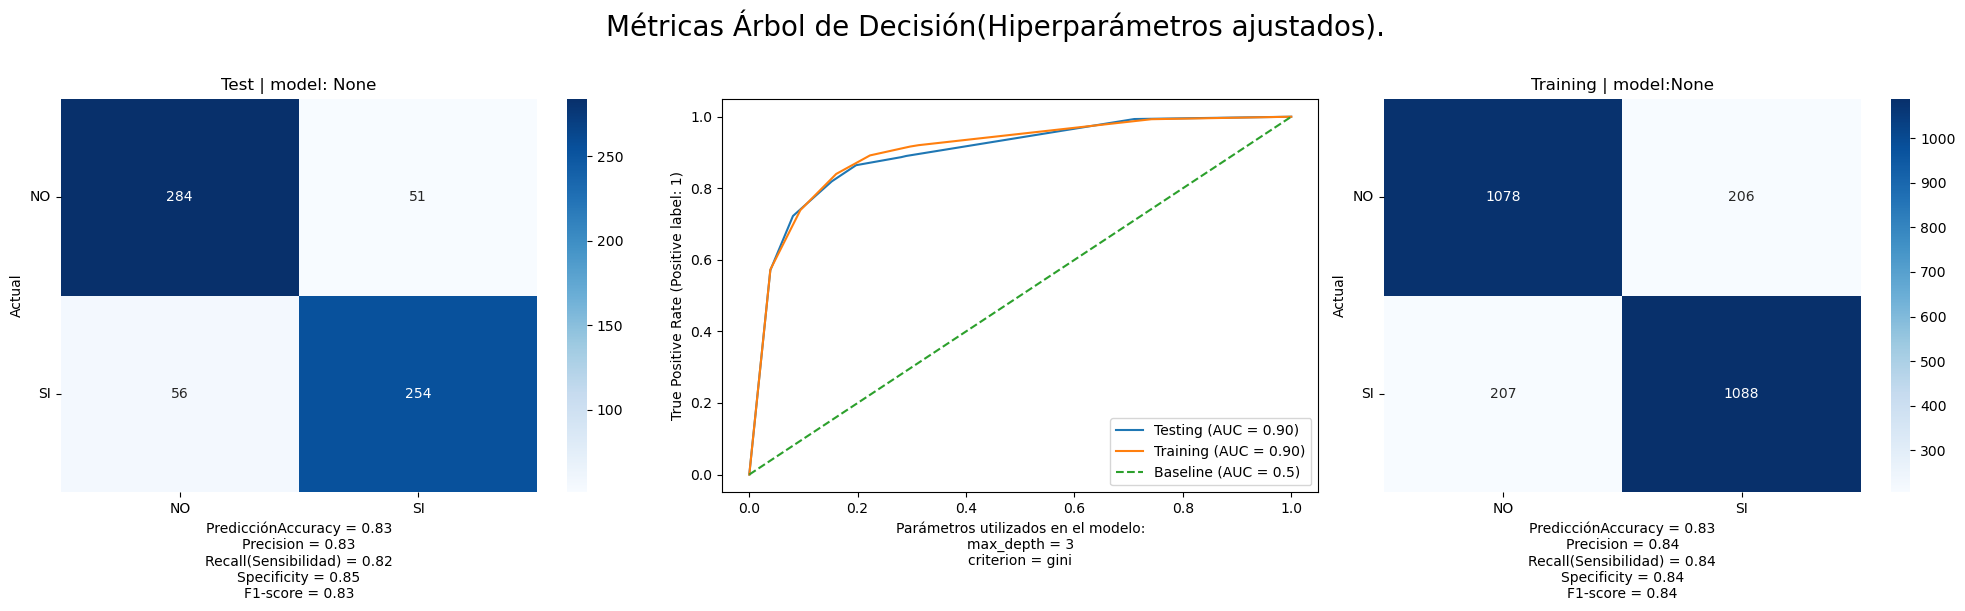

In [433]:
# Mostrar las métricas del mejor clasificador de árbol de decisión
plt.style.use('default')
fig,axes = plt.subplots(1,3,figsize=(20,6))

row=0
bestf1=0

prediccionMetrics(graph=True,returnMetric = 'f1', clf = 'dt',axes=axes, row=None, modelEstimator=bestDtClf, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

fig.suptitle("Métricas Árbol de Decisión(Hiperparámetros ajustados).",y=1.01, fontsize=20)
fig.tight_layout()
fig.subplots_adjust(hspace=0.8);

X_train

#### Entrenamiento con KNN

In [434]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y.apply(lambda x: 0 if x<=10 else 1), test_size=0.2, random_state=3)

In [435]:
# En este bloque de código se combinan iterativamente 
# los hiperparámetros del modelo y se selecciona el modelo
# con el mejor "F1-Score", para posteriormente mostrar
# las métricas y gráficos del modelo con los hiperparámetros ajustados. 

bestf1 = 0 # Almacena la mejor métrica obtenida
f1=0
for n_neighbors in [i for i in range(1,100)]:
    for weights in ['uniform','distance']:
        knnClf = KNeighborsClassifier(
                n_neighbors = n_neighbors,
                weights=weights)
        prediccionMetrics(graph=False,returnMetric = 'f1',clf='knn',axes=None, row=None, modelEstimator=knnClf, X_train=X_train_scaled, X_test=X_test_scaled, y_train=y_train_scaled, y_test=y_test_scaled)
        if f1 > bestf1: # Si la métrica f1 actual supera a la mejor hasta el momento
            bestf1 = f1 # Se almacena la métrica actual como la mejor 
            bestKnnClf = knnClf # Se almacena el clasificador 

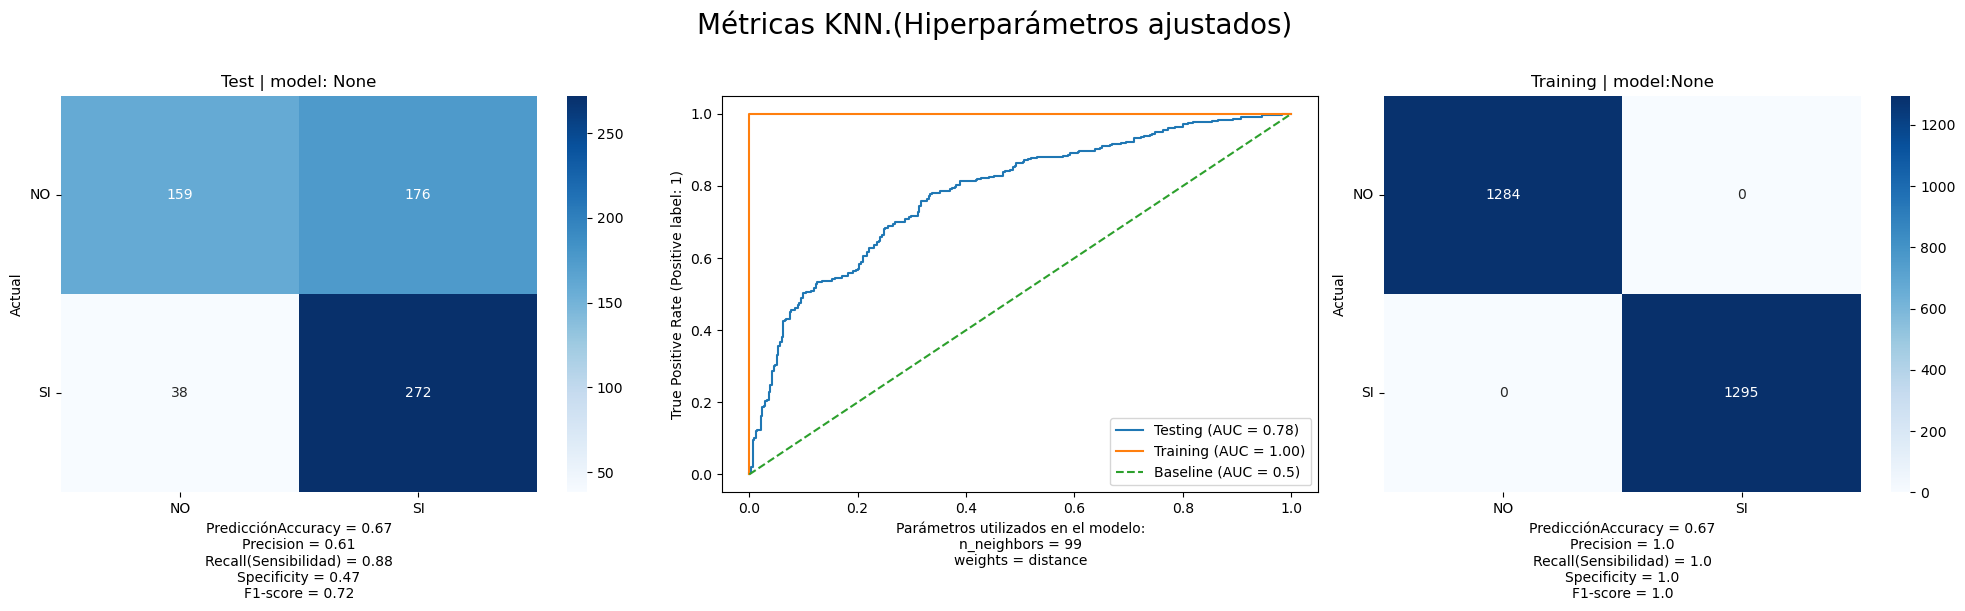

In [436]:
# Mostrar las métricas del mejor clasificador KNN
plt.style.use('default')
fig,axes = plt.subplots(1,3,figsize=(20,6))

row=0
bestf1=0

prediccionMetrics(graph=True,returnMetric = 'f1', clf = 'knn',axes=axes, row=None, modelEstimator=knnClf, X_train=X_train_scaled, X_test=X_test_scaled, y_train=y_train_scaled, y_test=y_test_scaled)

fig.suptitle("Métricas KNN.(Hiperparámetros ajustados)",y=1.01, fontsize=20)
fig.tight_layout()
fig.subplots_adjust(hspace=0.8);

#### Entrenamiento con Regresión Logística

In [437]:
# En este bloque de código se combinan iterativamente 
# los hiperparámetros del modelo y se selecciona el modelo
# con el mejor "F1-Score", para posteriormente mostrar
# las métricas y gráficos del modelo con los hiperparámetros ajustados. 

bestf1 = 0 # Almacena la mejor métrica obtenida
for C in [i*0.3 for i in range(1,15,3)]:
    for penalty in ['l1','l2']:
        lrClf = LogisticRegression(C=C, max_iter=10000,penalty=penalty, solver='liblinear', random_state=3)
        f1 = prediccionMetrics(graph=False,returnMetric = 'f1',clf = 'lr',axes=axes, row=None, modelEstimator=lrClf, X_train=X_train_scaled, X_test=X_test_scaled, y_train=y_train_scaled, y_test=y_test_scaled)
        if f1 > bestf1: # Si la métrica f1 actual supera a la mejor hasta el momento
            bestf1 = f1 # Se almacena la métrica actual como la mejor 
            bestLrClf = lrClf # Se almacena el clasificador 

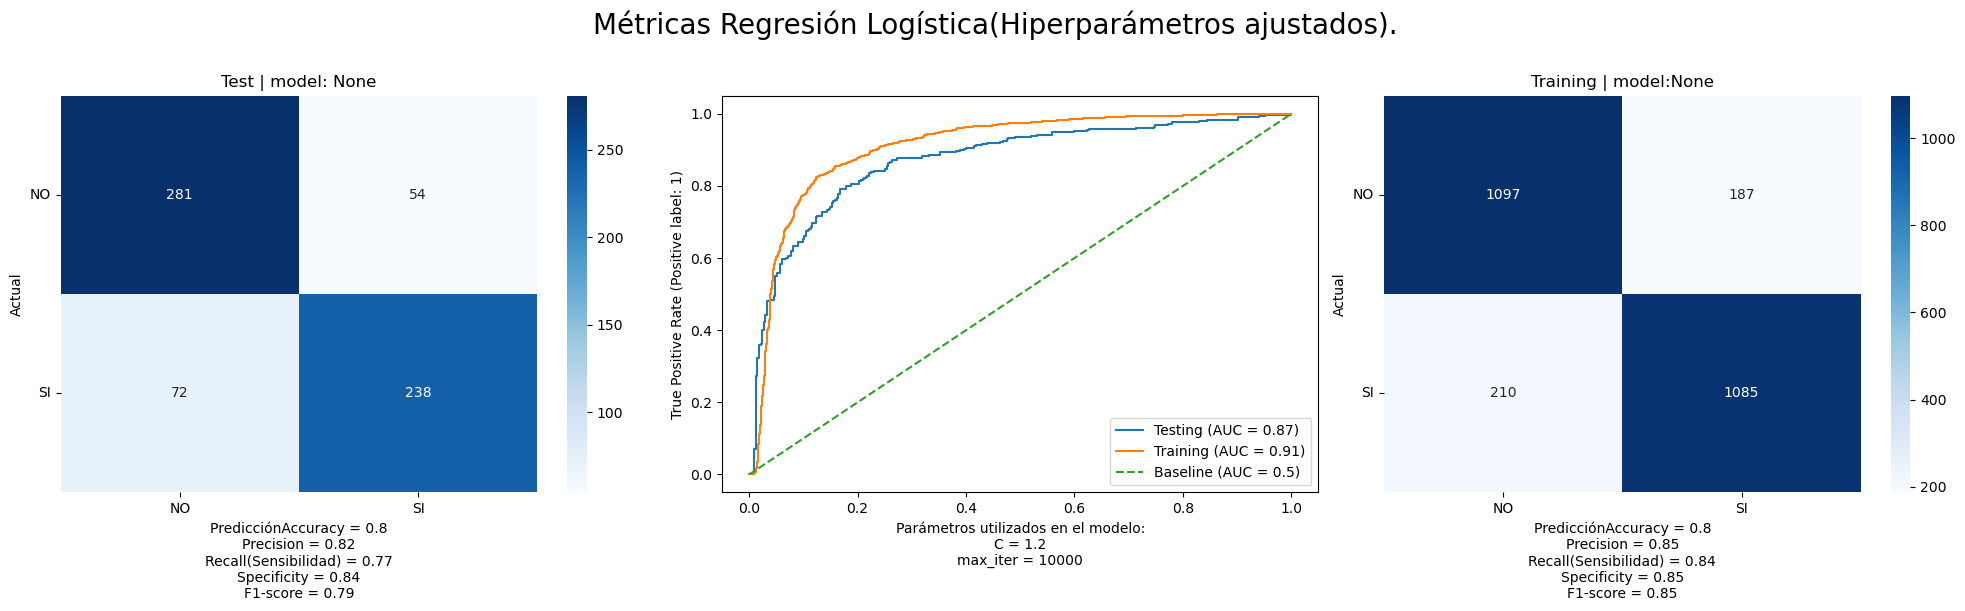

In [438]:
# Mostrar las métricas del mejor clasificador KNN
plt.style.use('default')
fig,axes = plt.subplots(1,3,figsize=(20,6))

row=0
bestf1=0

prediccionMetrics(graph=True,returnMetric = 'f1', clf = 'lr',axes=axes, row=None, modelEstimator=bestLrClf, X_train=X_train_scaled, X_test=X_test_scaled, y_train=y_train_scaled, y_test=y_test_scaled)

fig.suptitle("Métricas Regresión Logística(Hiperparámetros ajustados).",y=1.01, fontsize=20)
fig.tight_layout()
fig.subplots_adjust(hspace=0.8);

#### Entrenamiento con Random Forest

In [407]:
# En este bloque de código se combinan iterativamente 
# los hiperparámetros del modelo y se selecciona el modelo
# con el mejor "F1-Score", para posteriormente mostrar
# las métricas y gráficos del modelo con los hiperparámetros ajustados. 

bestf1 = 0 # Almacena la mejor métrica obtenida
for n_estimators in [200,1000]: # Lista de n_estimators a probar
    for max_depth in [1,20,100]: # Lista de max_depth a probar
        for bootstrap in [False, True]: # Probar con bootstrap y sin bootstrap

            # Instanciar el clasificador RandomForest iterando los parámetros
            # la instancia (rfClf) se pasará mediante la función prediccionMetrics
            rfClf = RandomForestClassifier(
                bootstrap = bootstrap,
                n_estimators=n_estimators,
                max_depth=max_depth,
                n_jobs=100,
                random_state=3)

            # Llamada a la función prediccionMetrics, sin que grafique, 
            # inficando el retonno F1-Score(f1),
            f1 = prediccionMetrics(graph=False,returnMetric = 'f1', clf = 'rf',axes=None, row=None, modelEstimator=rfClf, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
            if f1 > bestf1: # Si la métrica f1 actual supera a la mejor hasta el momento
                bestf1 = f1 # Se almacena la métrica actual como la mejor 
                bestRfClf = rfClf # Se almacena el clasificador 

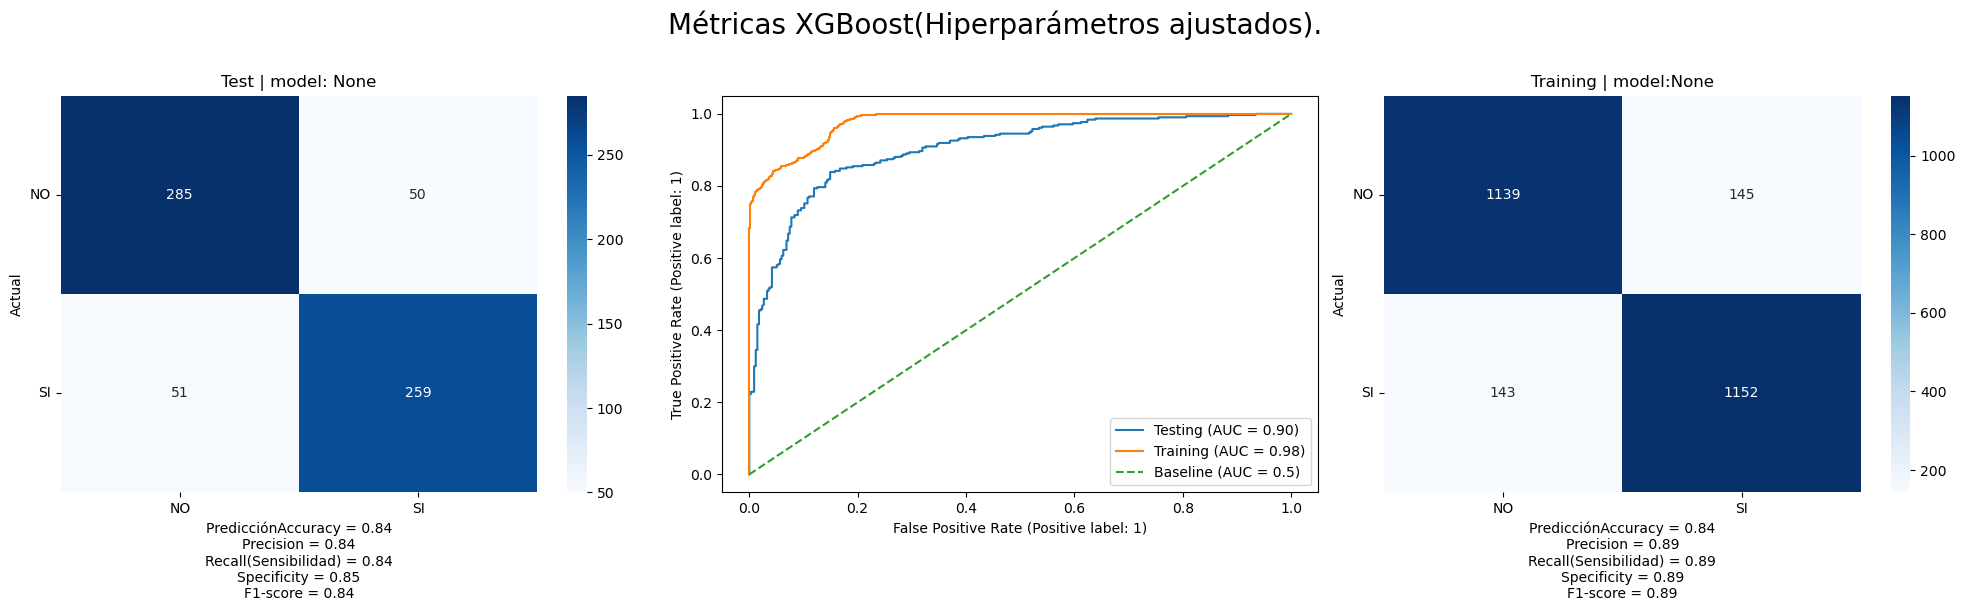

In [443]:
plt.style.use('default')
fig,axes = plt.subplots(1,3,figsize=(20,6))

row=0
bestf1=0

prediccionMetrics(graph=True,returnMetric = 'f1', clf = 'rf',axes=axes, row=None, modelEstimator=bestRfClf, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

fig.suptitle("Métricas Random Forest(Hiperparámetros ajustados).",y=1.01, fontsize=20)
fig.tight_layout()
fig.subplots_adjust(hspace=0.8);

In [ ]:
# En este bloque de código se combinan iterativamente 
# los hiperparámetros del modelo y se selecciona el modelo
# con el mejor "F1-Score", para posteriormente mostrar
# las métricas y gráficos del modelo con los hiperparámetros ajustados. 

bestf1 = 0 # Almacena la mejor métrica obtenida
for n_estimators in [10,200,10]: # Lista de n_estimators a probar
    for max_depth in [1,41,10]: # Lista de max_depth a probar
        for subsample in [0.2,0.4,0.6,0.8]: # Probar con bootstrap y sin bootstrap

            # Instanciar el clasificador RandomForest iterando los parámetros
            # la instancia (rfClf) se pasará mediante la función prediccionMetrics
            
            xgbClf= XGBClassifier(use_label_encoder=False,n_estimators=n_estimators, max_depth=max_depth, eta=0.03, subsample=subsample, colsample_bytree=0.8)


            # Llamada a la función prediccionMetrics, sin que grafique, 
            # inficando el retonno F1-Score(f1),
            f1 = prediccionMetrics(graph=False,returnMetric = 'f1', clf = 'rf',axes=None, row=None, modelEstimator=rfClf, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
            if f1 > bestf1: # Si la métrica f1 actual supera a la mejor hasta el momento
                bestf1 = f1 # Se almacena la métrica actual como la mejor 
                bestXGB = xgbClf # Se almacena el clasificador 

[01:22:01] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


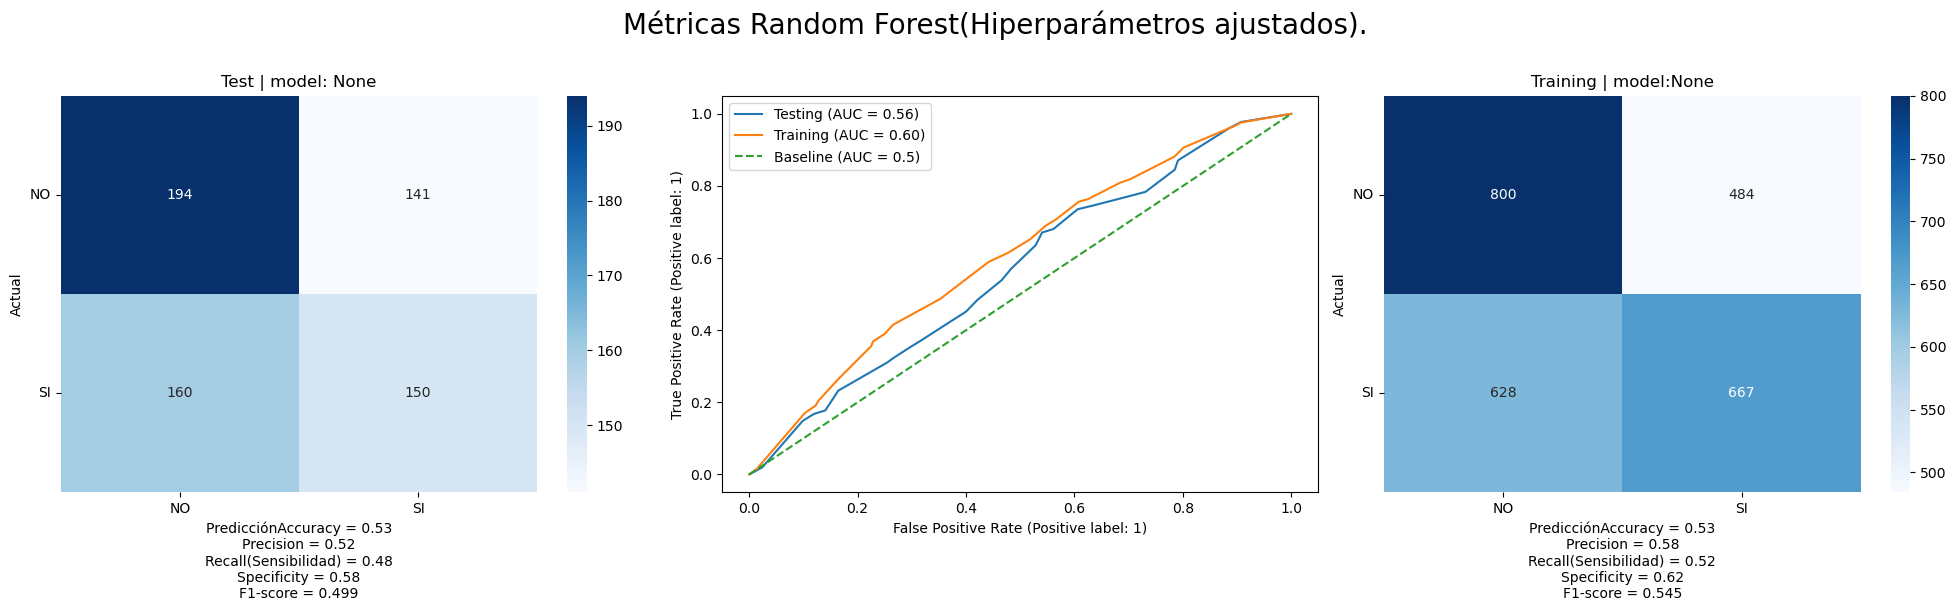

In [465]:
plt.style.use('default')
fig,axes = plt.subplots(1,3,figsize=(20,6))

row=0
bestf1=0

prediccionMetrics(graph=True,returnMetric = 'f1', clf = 'xgb',axes=axes, row=None, modelEstimator=bestXGB, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

fig.suptitle("Métricas Random Forest(Hiperparámetros ajustados).",y=1.01, fontsize=20)
fig.tight_layout()
fig.subplots_adjust(hspace=0.8);